2024-02-07: C:\Users\sanchmig\OneDrive - Hewlett Packard Enterprise\Documents\MSR\2021-11-04 EGADE\2023-09-11 5o trimestre\2023-09-12 Datos y finanzas\caso

Intro 

*	This case focuses on repayment rates, i.e., what makes people pay their loans? 
*	This is a supervised machine learning exercise. 
*	The algorithms used here are for binary classification purposes, i.e., identify if a person replays or default on their loan.

Summary of results: the top factors influencing individuals to be labelled as “repayers” were:
*	collection_recovery_fee	 (post charge off collection fee). It seems obvious, no one likes fees, whether hidden or unhidden; therefore it was expected that higher collection fees seem to prevent lenders from not paying.
*	last_fico_range_low: this is pretty much just FICO score; according to this model, FICO has done a really good job at identifying trustworthiness when it comes to repaying debt.
*	total_pymnt: self-explanatory, this is the total of all payments done to date, but not the total balance.
*	loan_amnt: self-explanatory, what the borrower borrowed, i.e., total debt. 



# 1.Start

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:/Users/sanchmig/OneDrive - Hewlett Packard Enterprise/Documents/MSR/2021-11-04 EGADE/2023-09-11 4o trimestre/2023-09-12 Datos y finanzas/caso/accepted_2007_to_2018Q4.csv")

In [5]:
pd.set_option("display.max_columns", None)
df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   

   int_rate  installment grade sub_grade     emp_title emp_length  \
0     13.99       123.03     C        C4       leadman  10+ years   
1     11.99       820.28     C        C1      Engineer  10+ years   
2     10.78       432.66     B        B4  truck driver  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0       MORTGAGE     55000.0        Not Verified  Dec-2015  Fully Paid   
1       MORTGAGE     65000.0        Not Verified  Dec-2015  Fully Paid   
2       MORTGAGE     63000.0        Not Verified  Dec-2015  Fully Paid   

  pymnt_plan                                                url desc  \
0          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
1          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   
2          n  https://lendingclub.com/browse/loanDetail.acti...  NaN   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    190xx         PA   5.91   
1      small_business            Business    577xx         SD  16.06   
2    home_improvement                 NaN    605xx         IL  10.78   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Aug-2003           675.0            679.0   
1          1.0         Dec-1999           715.0            719.0   
2          0.0         Aug-2000           695.0            699.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                    30.0                     NaN       7.0   
1             4.0                     6.0                     NaN      22.0   
2             0.0                     NaN                     NaN       6.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0     2765.0        29.7       13.0                   w        0.0   
1      0.0    21470.0        19.2       38.0                   w        0.0   
2      0.0     7869.0        56.2       18.0                   w        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   4421.723917          4421.72           3600.0   
1            0.0  25679.660000         25679.66          24700.0   
2            0.0  22705.924294         22705.92          20000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         821.72                 0.0         0.0                      0.0   
1         979.66                 0.0         0.0                      0.0   
2        2705.92                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2019           122.67          NaN           Mar-2019   
1     Jun-2016           926.35          NaN           Mar-2019   
2     Jun-2017         15813.30          NaN           Mar-2019   

   last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  \
0                 564.0                560.0                         0.0   
1                 699.0                695.0                         0.0   
2                 704.0                700.0                         0.0   

   mths_since_last_major_derog  policy_code application_type  \
0                         30.0          1.0       Individual   
1                          NaN          1.0       Individual   
2                          NaN          1.0        Joint App   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
0               NaN        NaN                       NaN             0.0   
1               NaN        NaN                       NaN            

In [46]:
# Original dataframe is 2,260,701 rows and 151 columns
# My current working file (2023-10-05) is x rows and xx columns
df.shape

(1276480, 151)

In [5]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [6]:
# Some quick stats to check outliers and other potential issues
df.describe().round()

member_id  loan_amnt  funded_amnt  funded_amnt_inv   int_rate  \
count        0.0  2260668.0    2260668.0        2260668.0  2260668.0   
mean         NaN    15047.0      15042.0          15023.0       13.0   
std          NaN     9190.0       9188.0           9192.0        5.0   
min          NaN      500.0        500.0              0.0        5.0   
25%          NaN     8000.0       8000.0           8000.0        9.0   
50%          NaN    12900.0      12875.0          12800.0       13.0   
75%          NaN    20000.0      20000.0          20000.0       16.0   
max          NaN    40000.0      40000.0          40000.0       31.0   

       installment   annual_inc        dti  delinq_2yrs  fico_range_low  \
count    2260668.0    2260664.0  2258957.0    2260639.0       2260668.0   
mean         446.0      77992.0       19.0          0.0           699.0   
std          267.0     112696.0       14.0          1.0            33.0   
min            5.0          0.0       -1.0          0.0           610.0   
25%          252.0      46000.0       12.0          0.0           675.0   
50%          378.0      65000.0       18.0          0.0           690.0   
75%          593.0      93000.0       24.0          0.0           715.0   
max         1720.0  110000000.0      999.0         58.0           845.0   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count        2260668.0       2260638.0               1102166.0   
mean             703.0             1.0                    35.0   
std               33.0             1.0                    22.0   
min              614.0             0.0                     0.0   
25%              679.0             0.0                    16.0   
50%              694.0             0.0                    31.0   
75%              719.0             1.0                    50.0   
max              850.0            33.0                   226.0   

       mths_since_last_record   open_acc    pub_rec  revol_bal  revol_util  \
count                359156.0  2260639.0  2260639.0  2260668.0   2258866.0   
mean                     72.0       12.0        0.0    16658.0        50.0   
std                      26.0        6.0        1.0    22948.0        25.0   
min                       0.0        0.0        0.0        0.0         0.0   
25%                      55.0        8.0        0.0     5950.0        32.0   
50%                      74.0       11.0        0.0    11324.0        50.0   
75%                      92.0       14.0        0.0    20246.0        69.0   
max                     129.0      101.0       86.0  2904836.0       892.0   

       total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
count  2260639.0  2260668.0      2260668.0    2260668.0        2260668.0   
mean        24.0     4207.0         4206.0      12083.0          12064.0   
std         12.0     7343.0         7342.0       9901.0           9897.0   
min          1.0        0.0            0.0          0.0              0.0   
25%         15.0        0.0            0.0       4546.0           4532.0   
50%         22.0        0.0            0.0       9330.0           9310.0   
75%         31.0     6150.0         6146.0      16941.0          16917.0   
max        176.0    40000.0        40000.0      63297.0          63297.0   

       total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
count        2260668.0      2260668.0           2260668.0   2260668.0   
mean            9506.0         2431.0                 2.0       144.0   
std             8322.0         2680.0                12.0       748.0   
min                0.0            0.0                -0.0         0.0   
25%             3000.0          728.0                 0.0         0.0   
50%             7000.0         1526.0                 0.0         0.0   
75%            13899.0         3108.0                 0.0         0.0   
max            40000.0        28192.0              1484.0     39860.0   

       collection_recovery_fee  last_pymn

In [48]:
# Check out blanks / missing data 
# If the column has a value (i.e., not 0), it indicates blanks
# e.g., "member_id" columns has 1,276,480 blanks

#pd.set_option('display.max_rows', None)
df.isnull().sum()

id                                                  0
member_id                                     1276480
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                       81184
emp_length                                      76070
home_ownership                                      0
annual_inc                                          0
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

## 1.a.Imputation

### 1.a.1. Make "loan_status" a dichotomous variable

In [49]:
# This is done so we can narrow "y" to 2 labels only:
# Either a customer repays (coded as 1), or they don´t (0)
df['loan_status'].value_counts()

Fully Paid     1018487
Charged Off     257993
Name: loan_status, dtype: int64

In [43]:
# Filter for 'Fully Paid' & 'Charged Off' categories only
filtro = df['loan_status'].isin(['Fully Paid', 'Charged Off'])

# Apply filter to df 
df = df[filtro]

# Verify changes 
print(df['loan_status'].unique())


['Fully Paid' 'Charged Off']


In [50]:
# Count of each our the "new" 2 labels
df['loan_status'].value_counts()

Fully Paid     1018487
Charged Off     257993
Name: loan_status, dtype: int64

In [51]:
# 1st data reduction 
# Resulting dataframe now has 1,345,310 rows and 151 columns
df.shape

(1276480, 151)

In [52]:
# 2a Reducción
# Delete irrelevant columns (n=96)
columnas_relevantes = ["acc_now_delinq", "annual_inc", "avg_cur_bal", "chargeoff_within_12_mths",
    "collection_recovery_fee", "collections_12_mths_ex_med", "delinq_2yrs",
    "delinq_amnt", "dti", "fico_range_low", "funded_amnt", "inq_last_6mths",
    "installment", "int_rate", "last_fico_range_low", "loan_amnt", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "open_acc", "pct_tl_nvr_dlq",
    "pub_rec", "pub_rec_bankruptcies", "revol_bal", "revol_util", "tax_liens", "total_acc",
    "total_pymnt", "total_rec_int", "total_rec_late_fee", "total_rec_prncp",
    "loan_status", 
    "emp_length", "grade", "home_ownership", "initial_list_status",
    "purpose", "pymnt_plan", "sub_grade", "term", 
    "verification_status", "disbursement_method"]

# Keep relevant columns only
df = df.loc[:, columnas_relevantes]

In [53]:
# New dataframe now has 1,345,310 row & 47 columns
# 46 cols + "loan_status" (dependent variable)
df.shape

(1276480, 41)

### 1.a.2. Remove 2 outliers from 'annual_inc' column

In [15]:
# The highest annual income record is 10+ million USD a year (!?)
# This is probably a mistake on the original dataframe
# Unlikely that someone would make 10+ million USD a year
# ...and be requesting a loan on a crowdfunding platform
df['annual_inc'].max()

10999200.0

In [55]:
# The previous .max() function shows the raw number
# This code adds commas so that large amounts are easy to read:

import locale
locale.setlocale(locale.LC_NUMERIC, '')

# We again get the max value from 'annual_inc' column
max_annual_inc = df['annual_inc'].max()

# Apply formatting
max_annual_inc_formatted = locale.format_string('%.2f', max_annual_inc, grouping=True)

# Show formatted value 
print(f'Max value on annual_inc: {max_annual_inc_formatted}')

Max value on annual_inc: 10,999,200.00


In [56]:
# We´ll calculate the 75th percentile on "annual_inc"
percentil_75 = df['annual_inc'].quantile(0.75)

# and use that as a threshold; i.e., we´ll remove all records with amounts
# greater than that percentile/threshold
df = df[df['annual_inc'] <= percentil_75]

In [57]:
# 3rd data reduction
# We now have 1,011,118rows and 47 columns
df.shape

(959243, 41)

# 2.EXPLORATORY DATA ANALYSIS

## Categorical Variables

Debe incluir LA VARIABLE DEPENDIENTE 'loan_status'

In [60]:
# We´ll create 2 dataframes for visualization purposes: 
# This 1st one will include columns with categorical data only
# Let´s add all categorial columns to a list, and call it "df_categoricos"
# Include the dependent variable "loan_status" (the labels for the model) 

df_categoricos = df[["emp_length", "grade", "home_ownership", "initial_list_status",
    "purpose", "pymnt_plan", "sub_grade", "term", "loan_status",
    "verification_status", "disbursement_method"]]

In [59]:
# Categorical variables = 11
len(df_categoricos.columns)

11

In [62]:
# Calculate null values on "df_categoricos"
valores_perdidos_df_categoricos = df_categoricos.isnull().sum()

# Calculate the same, as a % of its parent column
porcentaje_perdidos_df_categoricos = (valores_perdidos_df_categoricos / len(df_categoricos)) * 100

# Get data types for all columns
tipos_de_datos_df_categoricos = df_categoricos.dtypes

# Create a DataFrame, as summary
resumen_df_categoricos = pd.DataFrame({'Valores Perdidos': valores_perdidos_df_categoricos, 'Porcentaje Perdido': porcentaje_perdidos_df_categoricos, 'Tipo de Dato': tipos_de_datos_df_categoricos})

# Format column 'Porcentaje Perdido' as percentage
resumen_df_categoricos['Porcentaje Perdido'] = resumen_df_categoricos['Porcentaje Perdido'].round(2).map('{:.2f}%'.format)

# Filter for columns that have null values only
columnas_con_perdidos_df_categoricos = resumen_df_categoricos[resumen_df_categoricos['Valores Perdidos'] > 0]
columnas_con_perdidos_df_categoricos

Valores Perdidos Porcentaje Perdido Tipo de Dato
emp_length             70332              7.33%       object

In [63]:
# Employee length was the only column (from our categoricals) with nulls
# We´ll remove those rows, as it´s only 7% of the total and
# unlikely that our model will lose accuracy from dropping these
df.dropna(subset=['emp_length'], inplace=True)


In [64]:
# 4th reduction
# 938,584 rows after removing "emp_length" NANs
df.shape

(888911, 41)

## Numerical Variables

In [66]:
# Moving on to create that 2ns df we talked about
# this time, for columns that contain numerical data only 

df_numericos = df[["acc_now_delinq", "annual_inc", "avg_cur_bal", "chargeoff_within_12_mths",
    "collection_recovery_fee", "collections_12_mths_ex_med", "delinq_2yrs",
    "delinq_amnt", "dti", "fico_range_low", "funded_amnt", "inq_last_6mths",
    "installment", "int_rate", "last_fico_range_low", "loan_amnt", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "open_acc", "pct_tl_nvr_dlq",
    "pub_rec", "pub_rec_bankruptcies", "revol_bal", "revol_util", "tax_liens", "total_acc",
    "total_pymnt", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", "loan_status"]]

In [67]:
# Numerical variables = 31
len(df_numericos.columns)

31

In [68]:
# Calculate null values on "df_numericos"
valores_perdidos_df_numericos = df_numericos.isnull().sum()

# Calculate the same, as a % of its parent column
porcentaje_perdidos_df_numericos = (valores_perdidos_df_numericos / len(df_numericos)) * 100

# Get data types for all columns
tipos_de_datos_df_numericos = df_numericos.dtypes

# Create a DataFrame, as summary
resumen_df_numericos = pd.DataFrame({'Valores Perdidos': valores_perdidos_df_numericos, 'Porcentaje Perdido': porcentaje_perdidos_df_numericos, 'Tipo de Dato': tipos_de_datos_df_numericos})

# Format column 'Porcentaje Perdido' as percentage
resumen_df_numericos['Porcentaje Perdido'] = resumen_df_numericos['Porcentaje Perdido'].round(2).map('{:.2f}%'.format)

# Filter for columns that have null values only
columnas_con_perdidos_df_numericos = resumen_df_numericos[resumen_df_numericos['Valores Perdidos'] > 0]
columnas_con_perdidos_df_numericos

Empty DataFrame
Columns: [Valores Perdidos, Porcentaje Perdido, Tipo de Dato]
Index: []

In [19]:
columnas_con_nan = ["avg_cur_bal", "chargeoff_within_12_mths", "collections_12_mths_ex_med",
                    "dti", "num_accts_ever_120_pd", "num_actv_bc_tl", "pct_tl_nvr_dlq",
                    "pub_rec_bankruptcies", "revol_util", "tax_liens"]

# Drop rows with 'nan' / nulls on our specified columns, above
df.dropna(subset=columnas_con_nan, inplace=True)

In [69]:
# 5th reduction
# 885,455 rows after removing NANs from Numerical variables
df.shape

(888911, 41)

### Countplots (cat_vars)

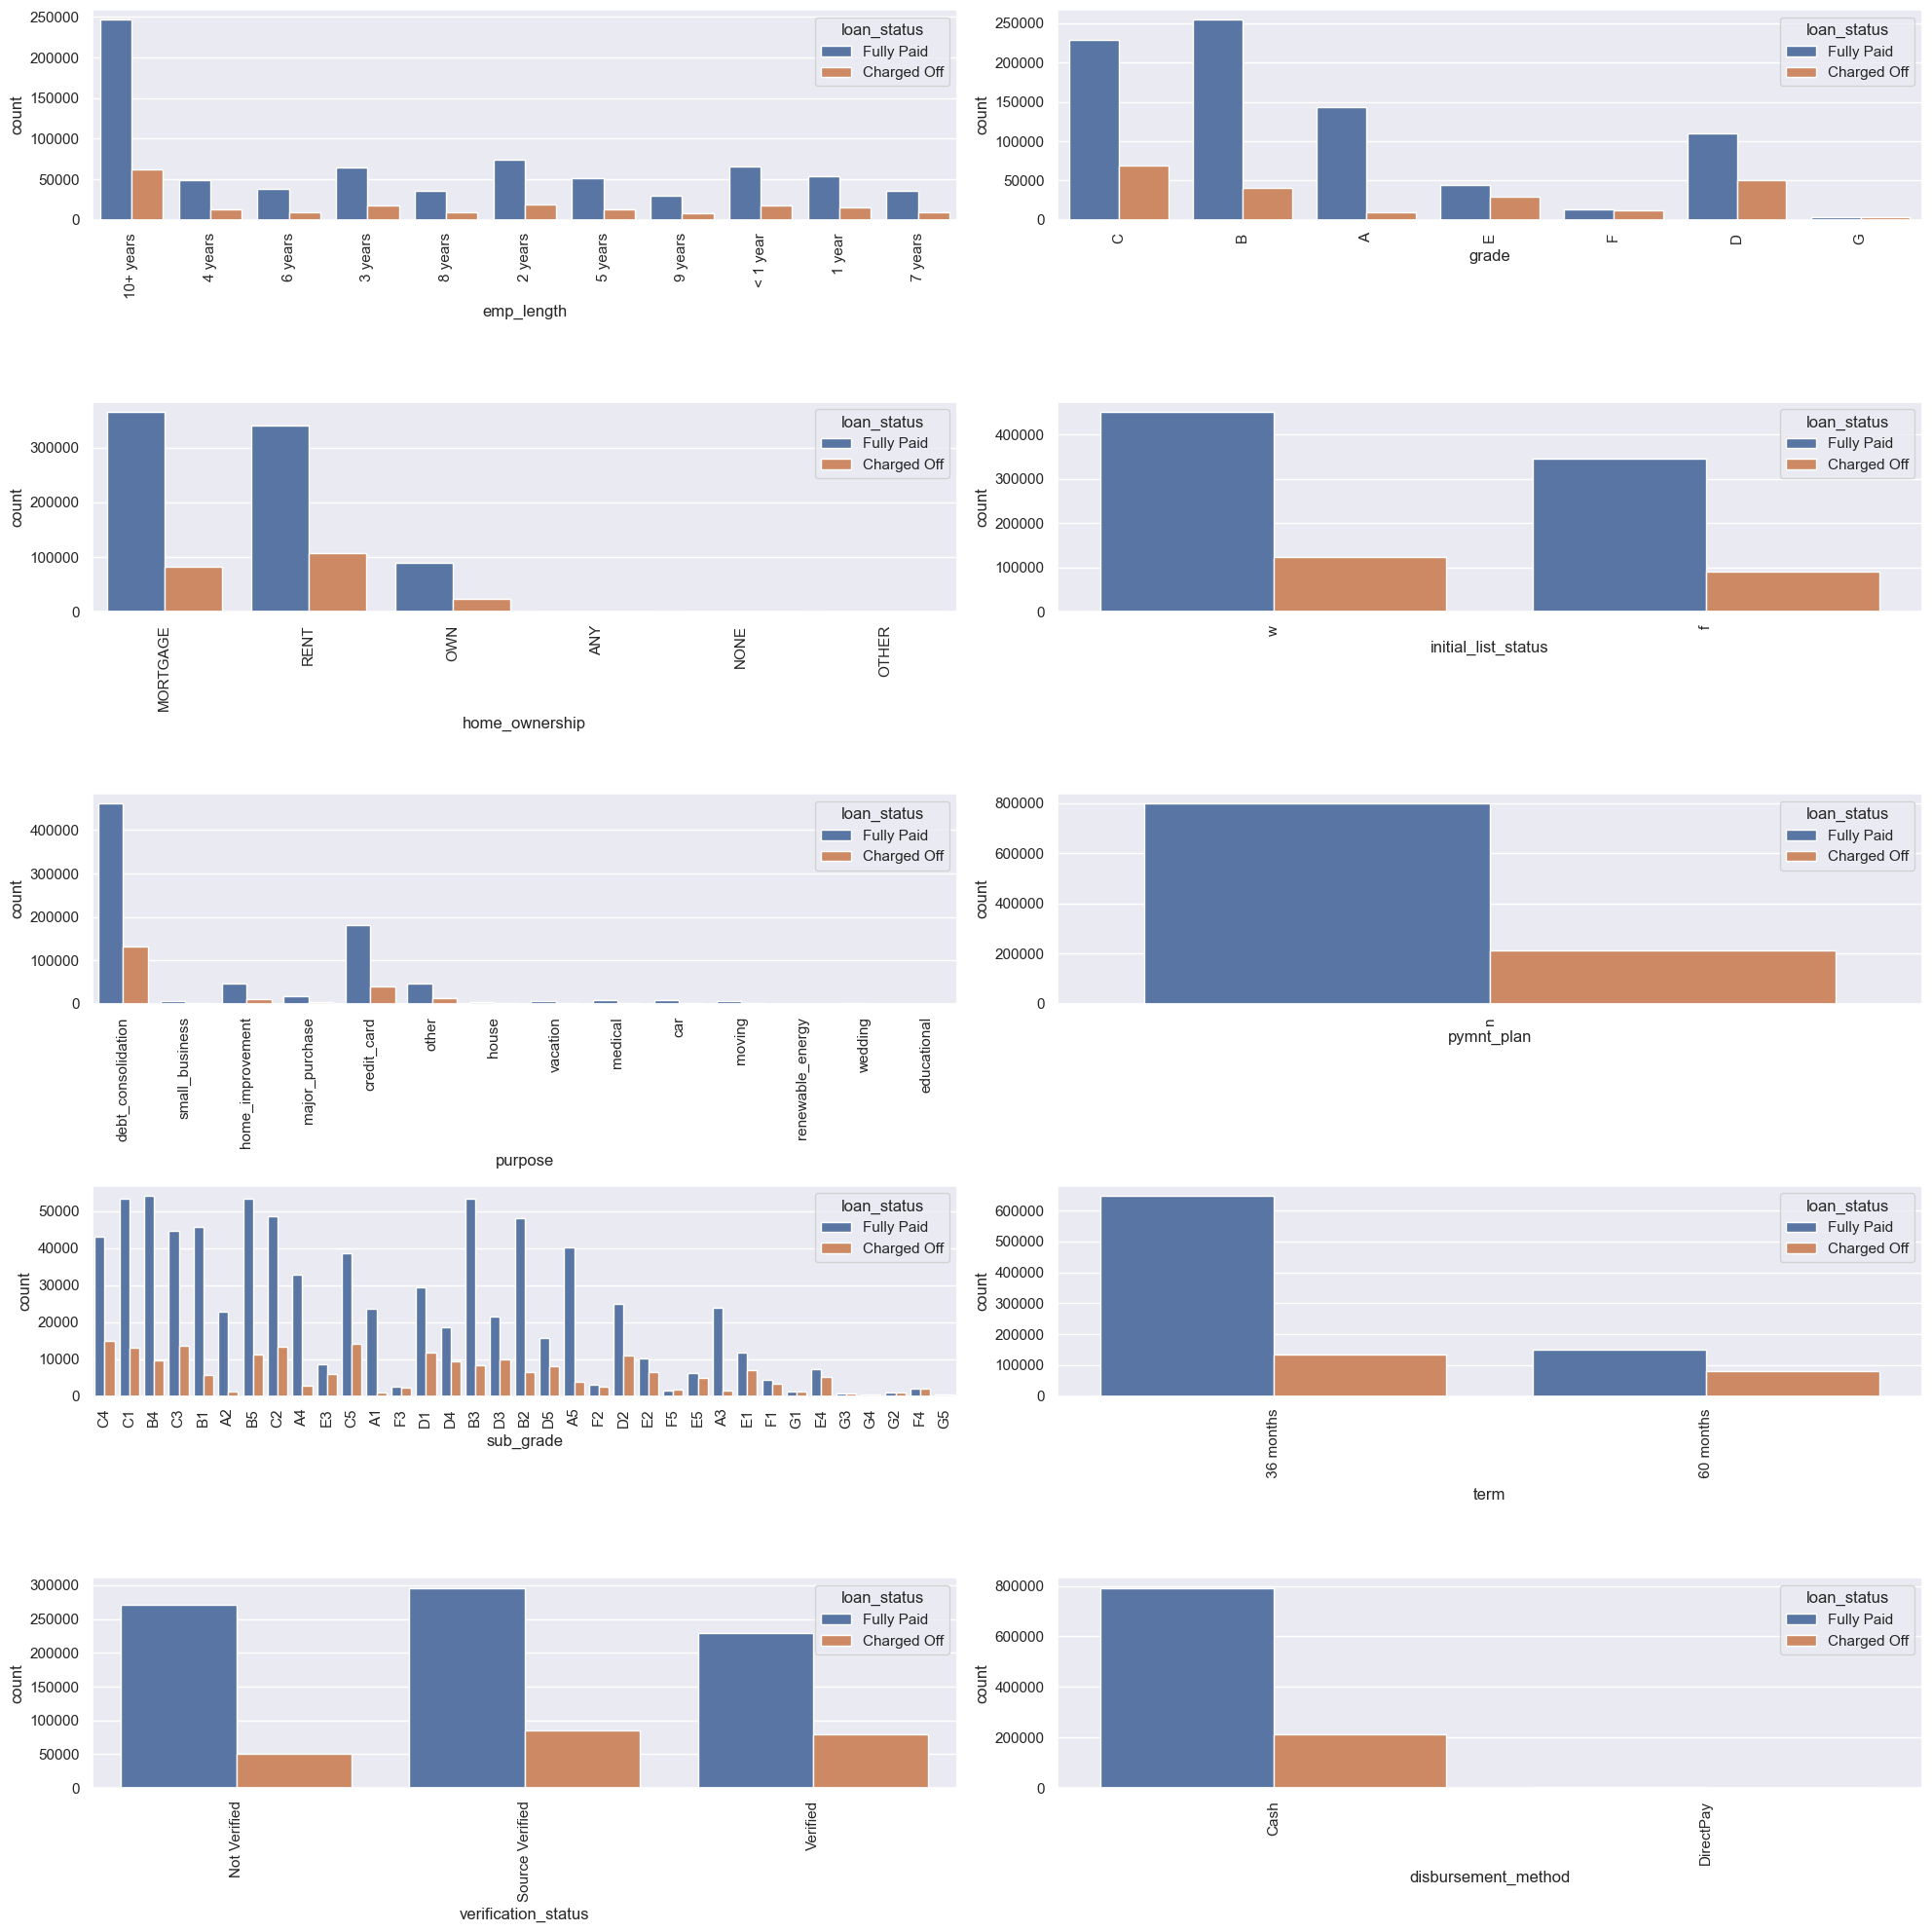

10

In [30]:
# More on sns.countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

cat_vars = ["emp_length", "grade", "home_ownership", "initial_list_status",
            "purpose", "pymnt_plan", "sub_grade", "term",
            "verification_status", "disbursement_method"]

#Create subplots figures 
fig, axs = plt.subplots(nrows=5, ncols=2, figsize = (20, 20))
axs = axs.flatten()

#Create countplots for each categorical variable
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue="loan_status", data = df_categoricos, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

fig.tight_layout() #Ajust space between subplots
plt.show()

len(cat_vars)

### Boxplots (num_vars)

In [84]:
# More on sns.boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

num_vars = ["acc_now_delinq", "annual_inc", "avg_cur_bal", "chargeoff_within_12_mths",
    "collection_recovery_fee", "collections_12_mths_ex_med", "delinq_2yrs",
    "delinq_amnt", "dti", "fico_range_low", "funded_amnt", "inq_last_6mths",
    "installment", "int_rate", "last_fico_range_low", "loan_amnt", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "open_acc", "pct_tl_nvr_dlq",
    "pub_rec", "pub_rec_bankruptcies", "revol_bal", "revol_util", "tax_liens", "total_acc",
    "total_pymnt", "total_rec_int", "total_rec_late_fee", "total_rec_prncp"]

In [85]:
print("df_numericos:", len(df_numericos.columns))
print("num_vars:", len(num_vars))

df_numericos: 31
num_vars: 30


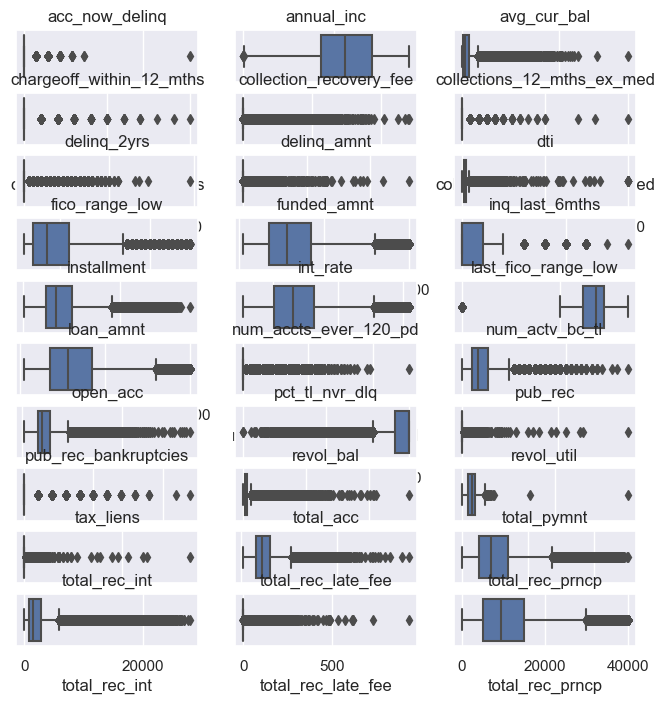

In [87]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(8, 8))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)  # Add title to axis

fig.tight_layout()

plt.show()

### Histplots (num_vars)

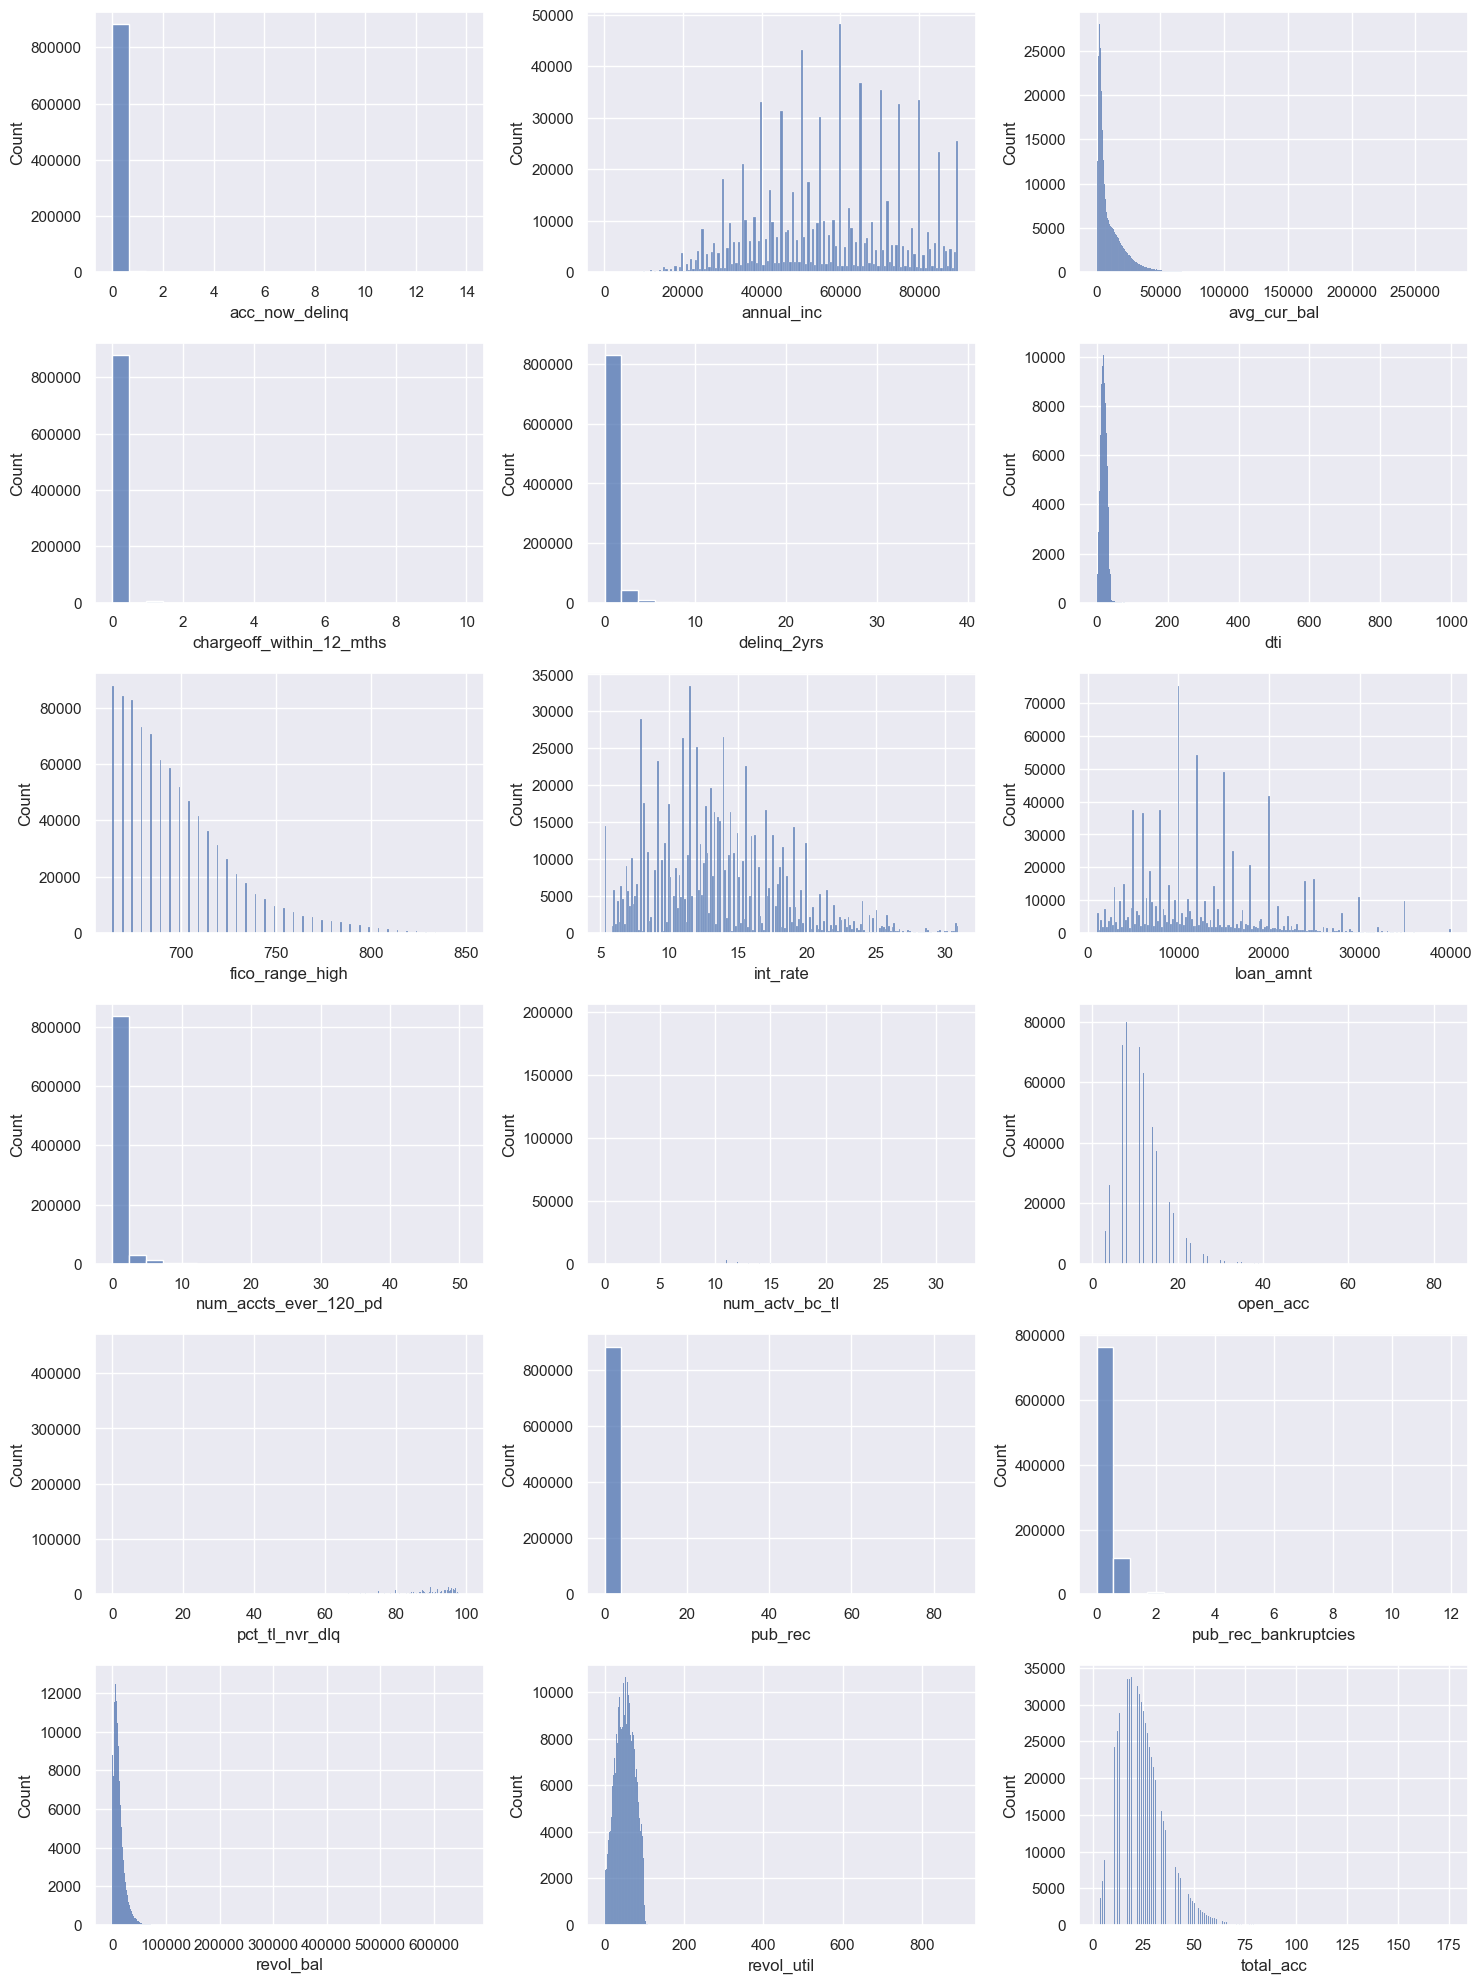

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

### Histplots w/hue (num_vars)

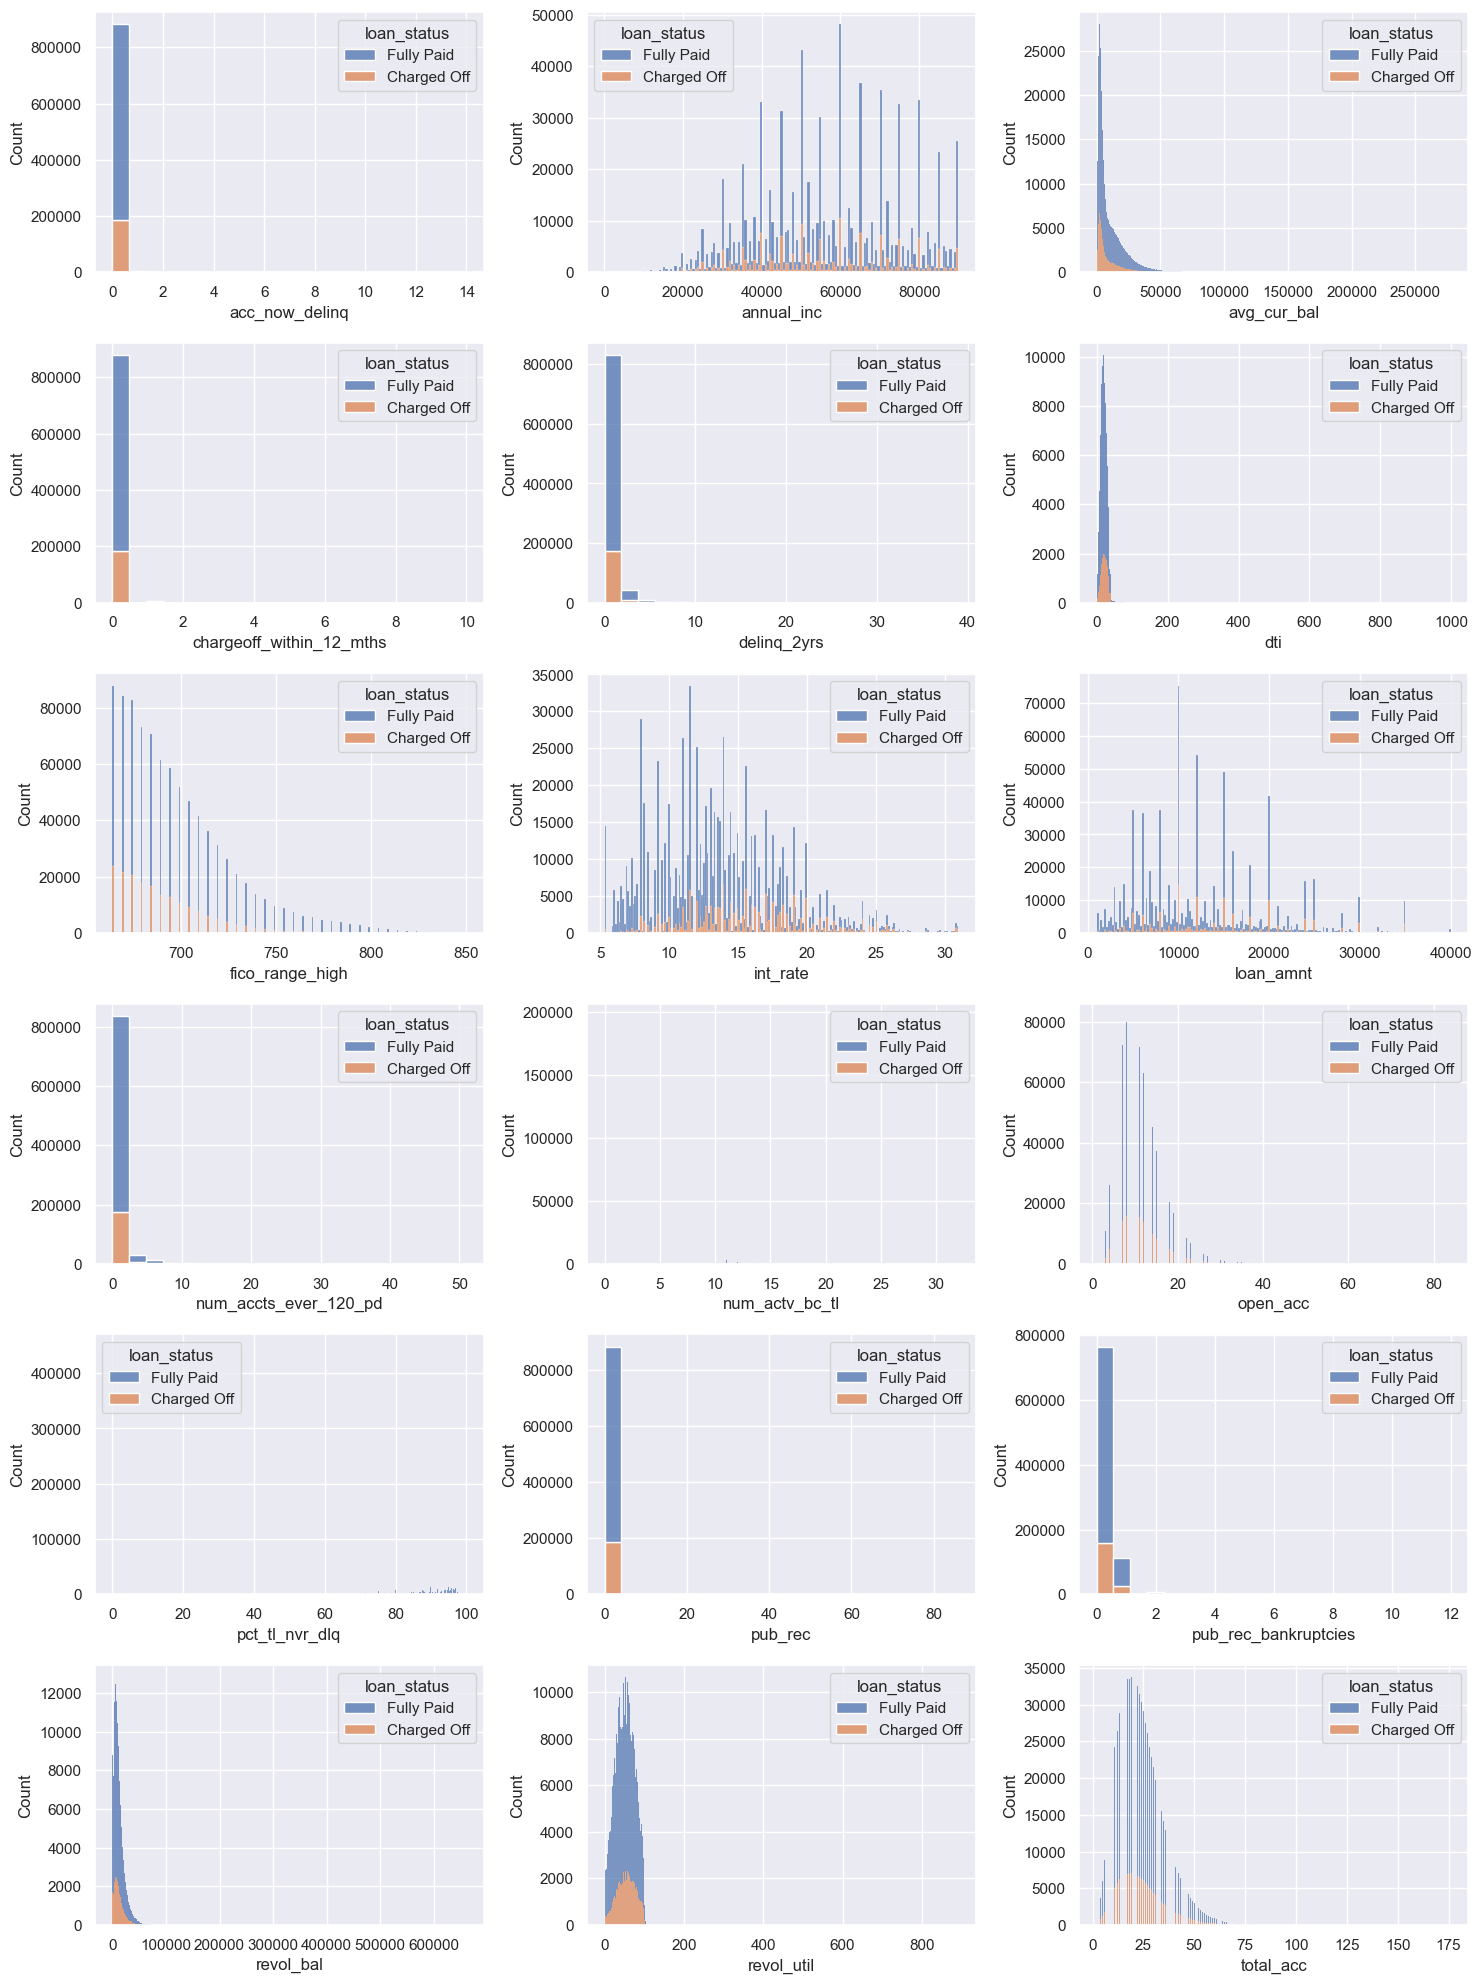

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, hue='loan_status', data=df, ax=axs[i], multiple="stack")

fig.tight_layout()

plt.show()

### violinplot (num_var)

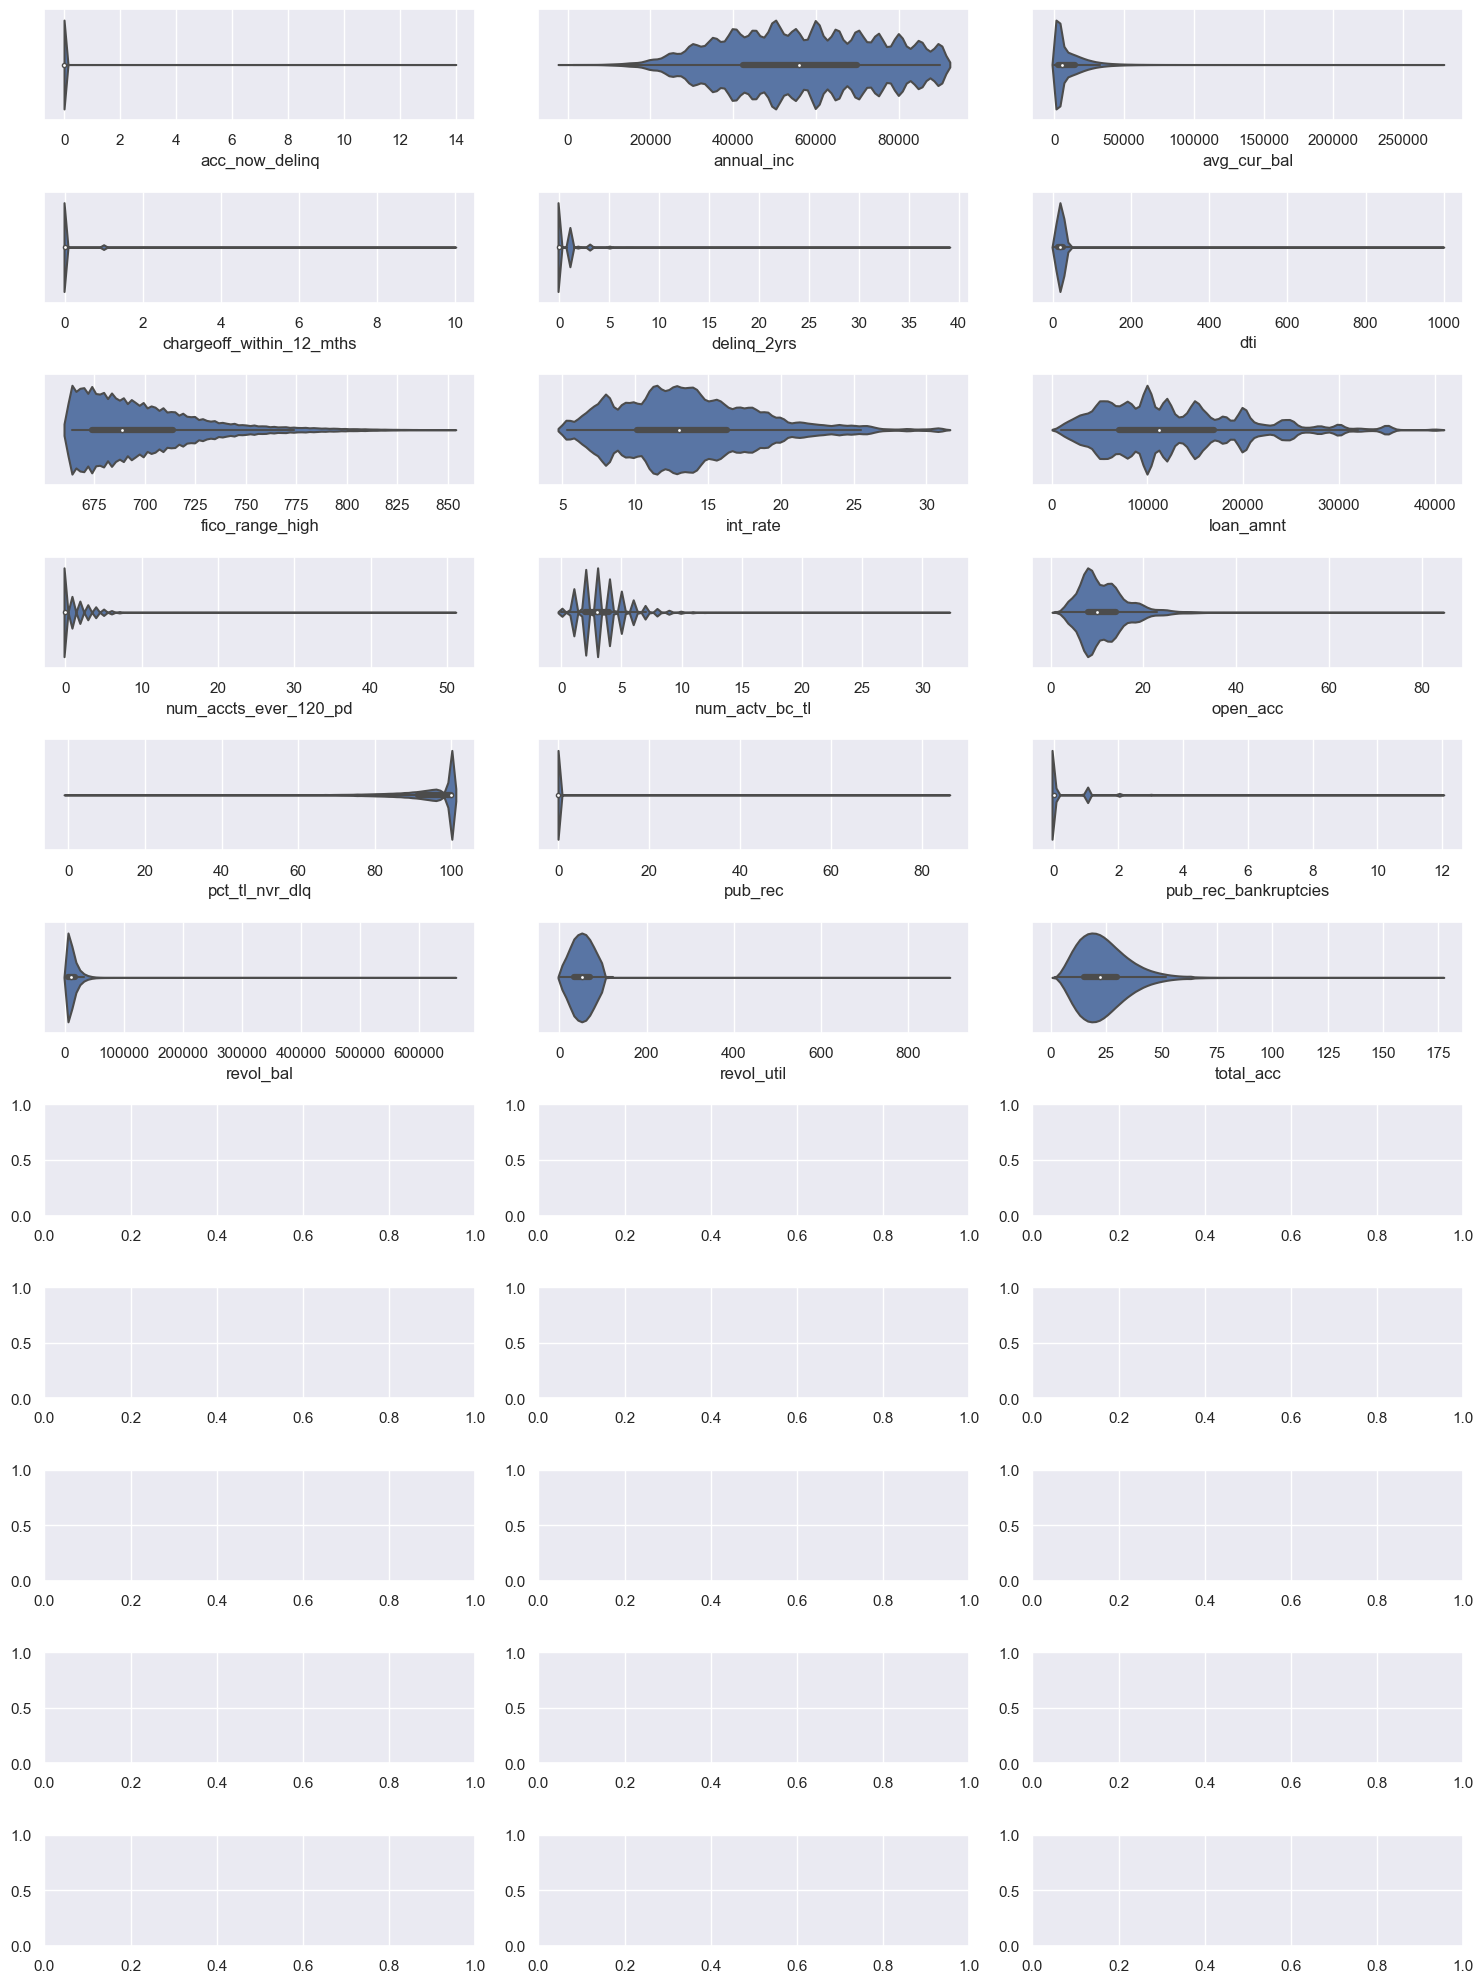

In [ ]:
# More on sns.violinplot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

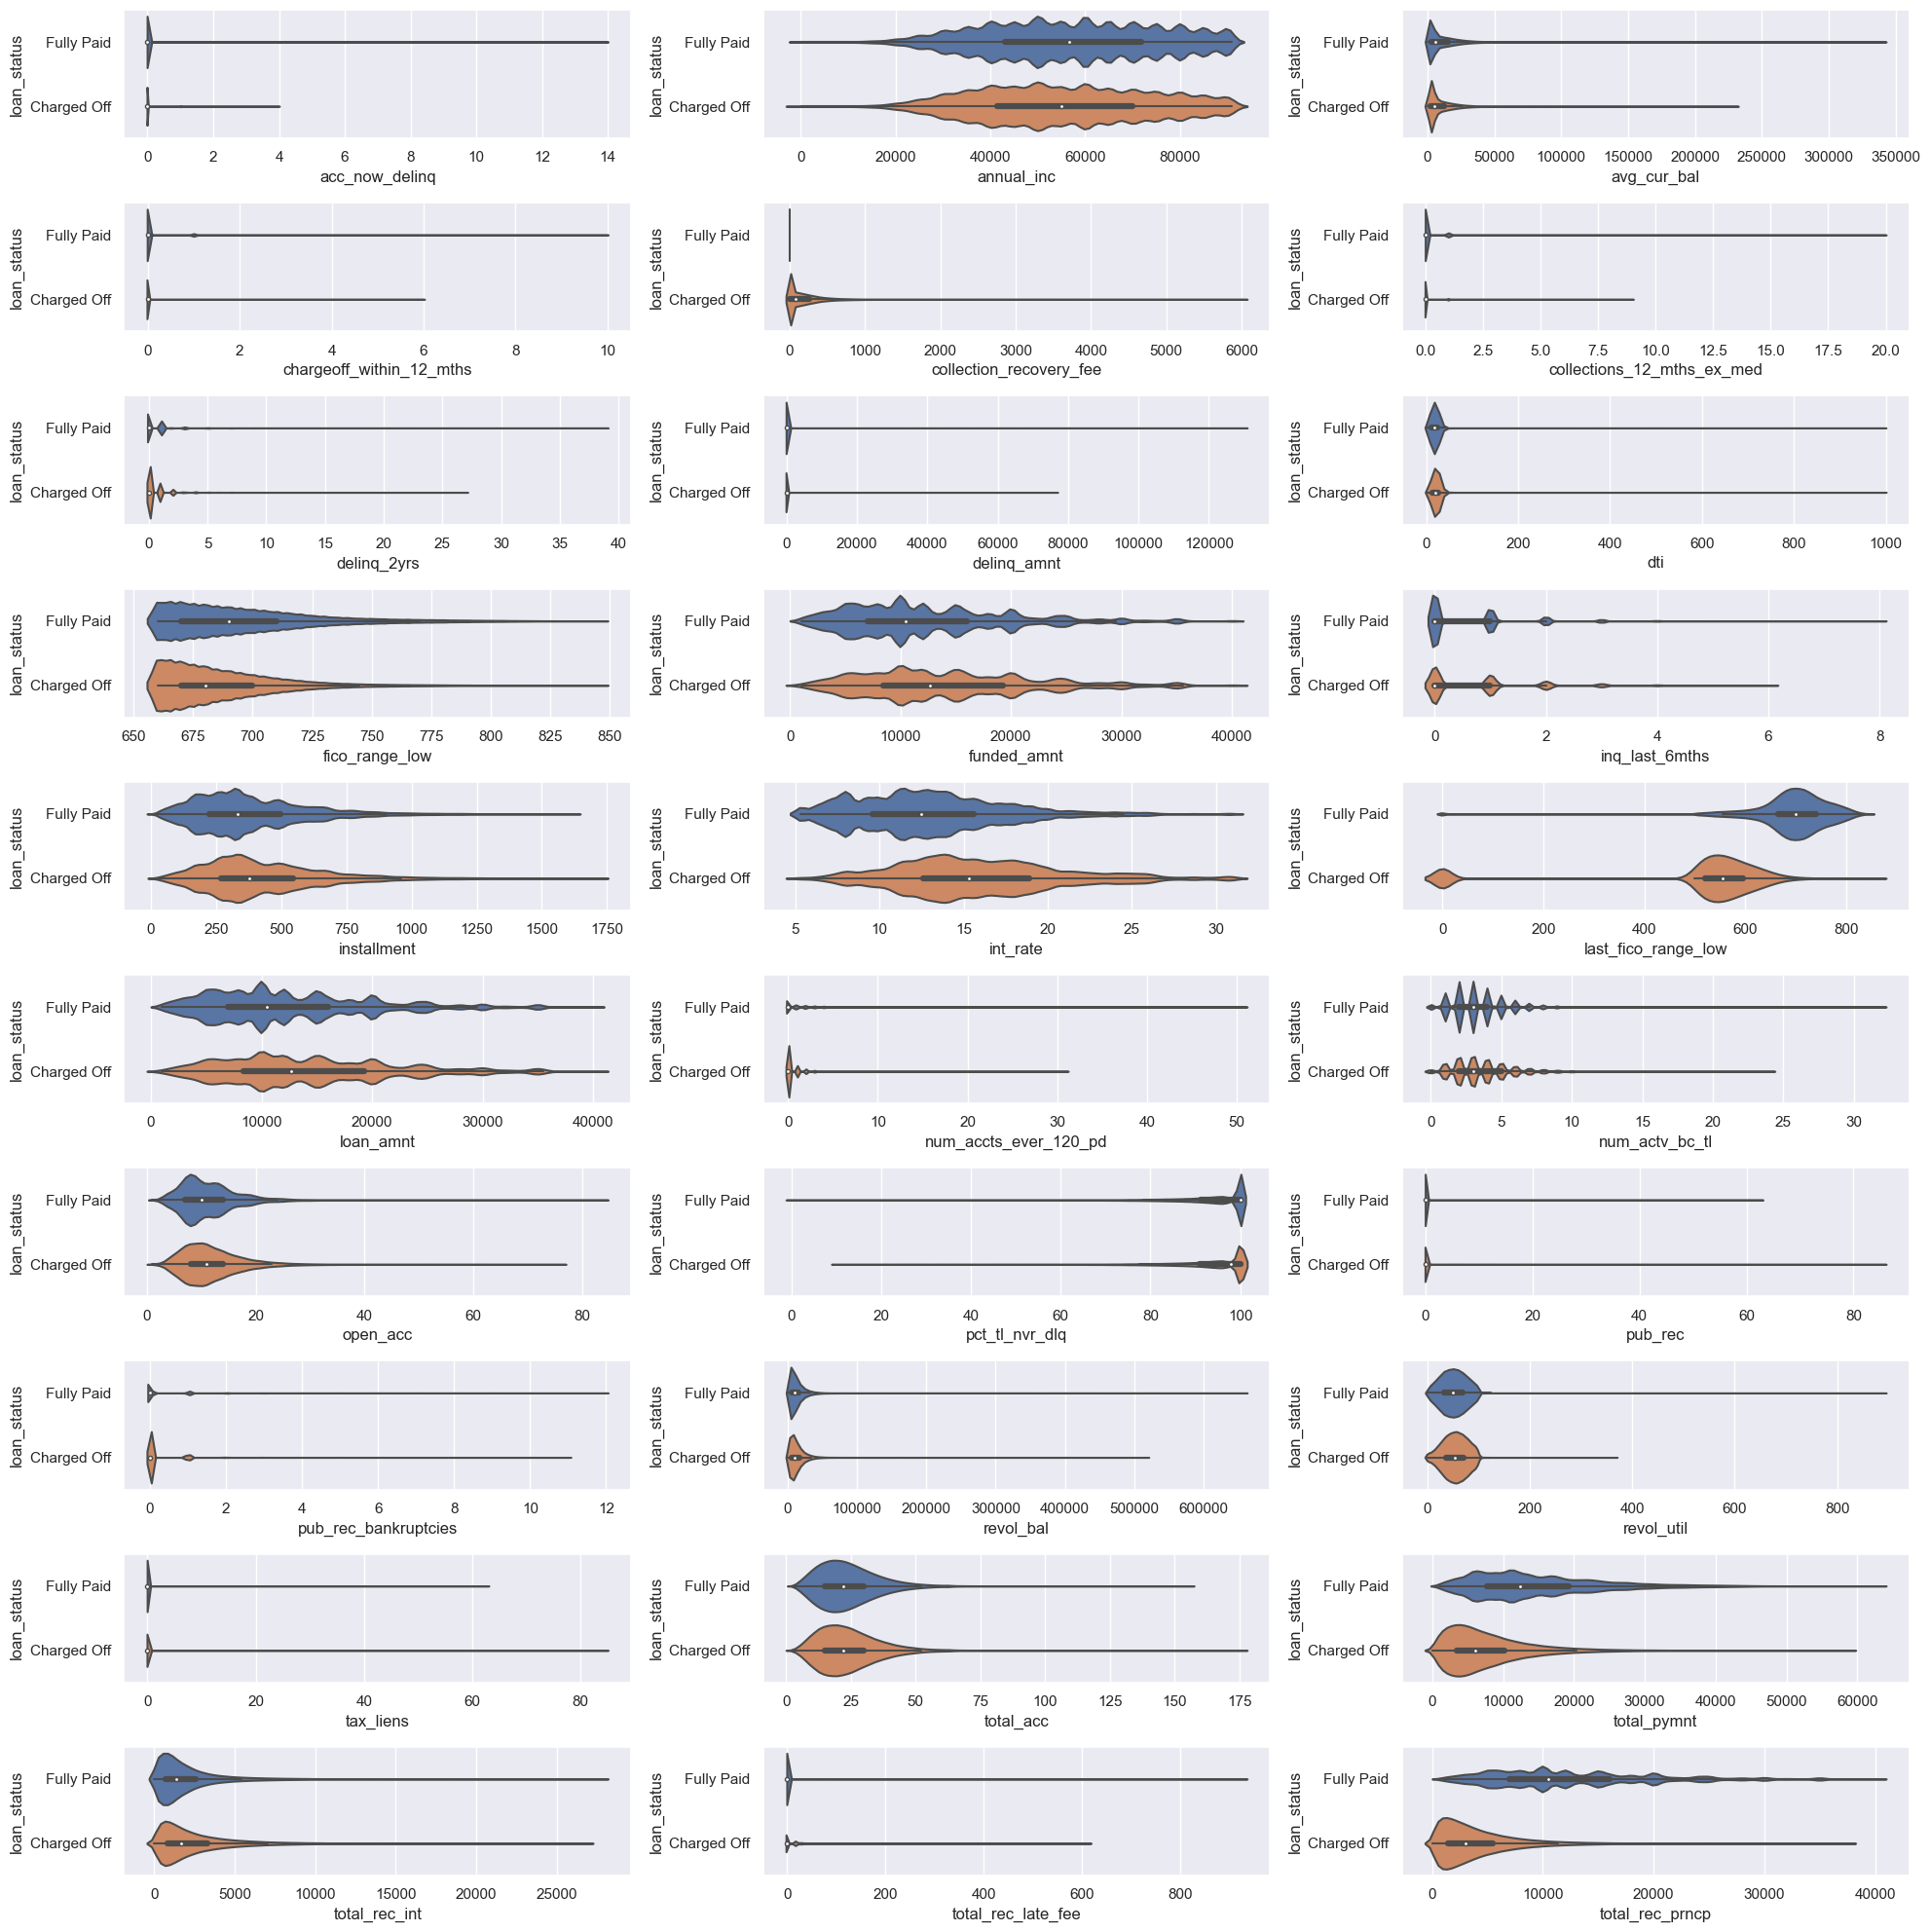

In [88]:
# This is very slow 

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, y="loan_status", data=df, ax=axs[i])

fig.tight_layout()

plt.show()

### pairplot (num_bars)

In [ ]:
# # More on sns.pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html

# # This creates a dispersion matrix, but takes a long time to load
sns.pairplot(df, hue='loan_status')

#3.Data Processing
Utilizar pandas.Series.unique

Devuelve valores únicos de una serie de objetos.

Los valor únicos se devuelven en orden de aparición. Los valores Únicos se basan en tablas hash, por lo tanto, NO se ordenan.

https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

#4.Transformar datos

El paquete sklearn.preprocessing proporciona varias funciones comunes que son de utilidad en la transformación de clases

para cambiar los vectores de características en una representación que sea más adecuada para los estimadores posteriores.

En general, los algoritmos de aprendizaje se benefician de la estandarización del conjunto de datos.

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
# Option 1. Requires one by one (a block of code for each column)... See instead Option 2

#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#df['earliest_cr_line']= label_encoder.fit_transform(df['earliest_cr_line'])
#df['earliest_cr_line'].unique()

In [34]:
# Option 2 (Cat vars only)

from sklearn import preprocessing

# List of cols to transform - add as needed
columnas_a_transformar = ["emp_length", "grade", "home_ownership", "initial_list_status",
    "purpose", "pymnt_plan", "sub_grade", "term", "loan_status",
    "verification_status", "disbursement_method"]

# Create a LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Iterate on each column y apply transformation
for columna in columnas_a_transformar:
    df[columna] = label_encoder.fit_transform(df[columna])

# Verify unique transformations for each column
for columna in columnas_a_transformar:
    print(f'Columna: {columna}')
    print(df[columna].unique())


Columna: emp_length
[ 1  4  6  3  8  2  5  9 10  0  7]
Columna: grade
[2 1 0 4 5 3 6]
Columna: home_ownership
[1 5 4 0 2 3]
Columna: initial_list_status
[1 0]
Columna: purpose
[ 2 11  4  6  1  9  5  7  0  8 12 10 13  3]
Columna: pymnt_plan
[0]
Columna: sub_grade
[13 10  8 12  5  1  9 11  3 22 14  0 27 15 18  7 17  6 19  4 26 16 21 29
 24  2 20 25 30 23 32 33 31 28 34]
Columna: term
[0 1]
Columna: loan_status
[1 0]
Columna: verification_status
[0 1 2]
Columna: disbursement_method
[0 1]


In [35]:
# Option 2 (numerical vars only)

# List of cols to transform - add as needed
columnas_a_transformar = ["acc_now_delinq", "annual_inc", "avg_cur_bal", "chargeoff_within_12_mths",
    "collection_recovery_fee", "collections_12_mths_ex_med", "delinq_2yrs",
    "delinq_amnt", "dti", "fico_range_low", "funded_amnt", "inq_last_6mths",
    "installment", "int_rate", "last_fico_range_low", "loan_amnt", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "open_acc", "pct_tl_nvr_dlq",
    "pub_rec", "pub_rec_bankruptcies", "revol_bal", "revol_util", "tax_liens", "total_acc",
    "total_pymnt", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", "loan_status"]
  # Agrega todas las columnas que necesites

# Create a LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Iterate on each column y apply transformation
for columna in columnas_a_transformar:
    df[columna] = label_encoder.fit_transform(df[columna])

# Verify unique transformations for each column
for columna in columnas_a_transformar:
    print(f'Columna: {columna}')
    print(df[columna].unique())

Columna: acc_now_delinq
[0 1 2 4 3 5 6]
Columna: annual_inc
[20034 26252 25113 ... 14151 29318 19988]
Columna: avg_cur_bal
[20701  9733 31599 ... 52729 42525 47453]
Columna: chargeoff_within_12_mths
[ 0  1  2  3  6  4  5 10  8  7  9]
Columna: collection_recovery_fee
[    0 19481 63764 ... 48400 93553 72224]
Columna: collections_12_mths_ex_med
[ 0  1  2  3  4  5 10  6 11  7 12 13  9  8]
Columna: delinq_2yrs
[ 0  1  2  3  5  4 15  6  7  9  8 11 13 10 14 12 18 16 17 20 22 24 26 19
 21 25 23]
Columna: delinq_amnt
[   0  555   40 ...  671 1189  673]
Columna: dti
[ 592 1607 1079 ... 5675 6030 5088]
Columna: fico_range_low
[ 3 11  7  6  9  5  8  1 13 35 24  0 14  4  2 19 12 28 18 10 25 16 27 21
 15 31 20 26 29 22 17 30 33 23 32 36 34 37]
Columna: funded_amnt
[ 104  948  760 ... 1446 1423 1406]
Columna: inq_last_6mths
[1 4 0 2 3 5 6 8 7]
Columna: installment
[ 5893 60247 32054 ... 67513 67883 51317]
Columna: int_rate
[143 106  87 132  52  12  99 122  33 229 160   1 285 174 201  70 194  60
 208

# 5.Balance labels:

"loan_status" Label

1    699409
0    186046
Name: loan_status, dtype: int64

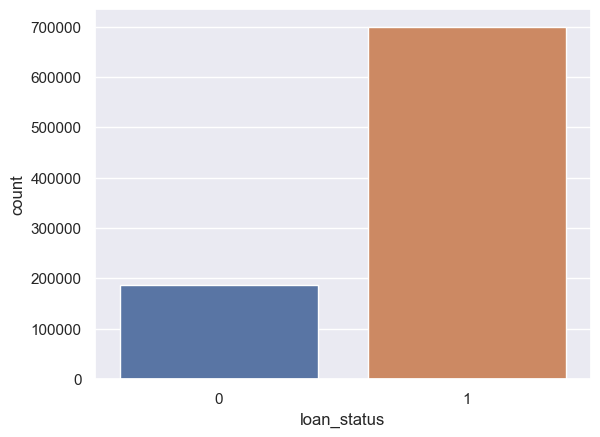

In [36]:
## Insert a chart to check the number of observations for each of the two labels
sns.countplot(x=df['loan_status'])
df['loan_status'].value_counts()

# 6.Use of resample function
https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

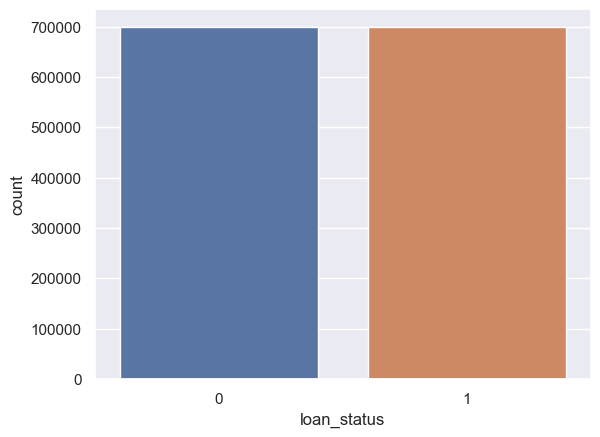

0    699409
1    699409
Name: loan_status, dtype: int64


In [37]:
# This is UPSAMPLE. ("df_upsampled") BUT, decided to DOWNSAMPLE instead. See next cell

        # from sklearn.utils import resample
        # #Create two dataframes, one for each class: large and smaller
        # df_majority_up = df[(df['loan_status']==1)]
        # df_minority_up = df[(df['loan_status']==0)]

        # # muestreo ascendente de la clase minoritaria
        # df_minority_upsampled = resample(df_minority_up,
        #                                 replace=True,     # muesta con reemplazo
        #                                 n_samples= 699409, # para que coincida con la clase mayoritaria
        #                                 random_state=0)   # resultados reproducible

        # # Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria
        # df_upsampled = pd.concat([df_minority_upsampled, df_majority_up])

        # # Graficar la cuenta de valores para 'loan_status'
        # sns.countplot(x=df_upsampled['loan_status'])
        # plt.show()

        # # Mostrar la cuenta de valores para 'loan_status'
        # print(df_upsampled['loan_status'].value_counts())


In [90]:
# DOWNSAMPLE ("df_downsampled")

from sklearn.utils import resample

#Create two dataframes, one for each class: large and smaller
df_majority = df[df['loan_status'] == 1]
df_minority = df[df['loan_status'] == 0]

# Downsample the majority class 
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Sample with no replacement
                                   n_samples=len(df_minority),  # Equate to the minority class
                                   random_state=0)   # Reproducible results

# Combine the smaller class to the larger-downsampled class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Chart it out to check it worked
sns.countplot(x=df_downsampled['loan_status'])
plt.show()

# Show count of each as well
print(df_downsampled['loan_status'].value_counts())


ValueError: min() arg is an empty sequence

#8.Correlación mostrando un heatmap
Seaborn es una biblioteca de python que permite hacer mejores gráficos fácilmente gracias a su función heatmap(). Un mapa de calor es una representación gráfica de datos donde cada valor de una matriz se representa como un color.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [89]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_downsampled.corr().head

NameError: name 'df_downsampled' is not defined

In [44]:
# Calcular la matriz de correlación
correlation_matrix = df_downsampled.corr()

# Crear una lista de pares de columnas y sus correlaciones
correlation_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        correlation_list.append((col1, col2, correlation_value))

# Ordenar la lista de correlaciones por valor absoluto de mayor a menor
sorted_correlation_list = sorted(correlation_list, key=lambda x: abs(x[2]), reverse=True)

# Mostrar las correlaciones ordenadas de mayor a menor
for col1, col2, correlation_value in sorted_correlation_list:
    print(f'{col1} - {col2}: {correlation_value}')

loan_amnt - funded_amnt: 0.9999999997471802
grade - int_rate: 0.9522648768400467
installment - funded_amnt: 0.9499044755437013
loan_amnt - installment: 0.9499044677904342
total_rec_prncp - total_pymnt: 0.8515334847161283
loan_status - last_fico_range_low: 0.7705031366216347
pub_rec_bankruptcies - pub_rec: 0.699557526464605
total_acc - open_acc: 0.6901335048988655
total_rec_int - funded_amnt: 0.6886049993635556
total_rec_int - loan_amnt: 0.6886049405791466
total_rec_int - total_pymnt: 0.6838117870600491
total_pymnt - loan_amnt: 0.6571290608883739
total_pymnt - funded_amnt: 0.6571290542766046
total_pymnt - installment: 0.6563750331707993
total_rec_int - installment: 0.6454150226820657
tax_liens - pub_rec: 0.6373287678176118
loan_status - total_rec_prncp: 0.6340652648556442
pct_tl_nvr_dlq - num_accts_ever_120_pd: -0.567799558418195
loan_status - collection_recovery_fee: -0.5659701861190393
home_ownership - avg_cur_bal: -0.529879562658639
term - total_rec_int: 0.5275814894309088
total_rec_

In [45]:
columnas_eliminar = ['grade', 'funded_amnt', 'installment', 
                     'total_rec_prncp', 'pub_rec', 'open_acc', 'total_rec_int']

# Eliminar las columnas identificadas como altamente correlacionadas
df_downsampled.drop(columnas_eliminar, axis=1, inplace=True)

In [46]:
# Verificar los cambios
df_downsampled.head(3)  # Imprime las primeras filas del DataFrame para verificar las modificaciones

acc_now_delinq  annual_inc  avg_cur_bal  chargeoff_within_12_mths  \
390352                0       26252         1304                         0   
1029022               0       11115        22101                         0   
1237022               0       23284        32083                         0   

         collection_recovery_fee  collections_12_mths_ex_med  delinq_2yrs  \
390352                         0                           0            0   
1029022                        0                           0            0   
1237022                        0                           0            0   

         delinq_amnt   dti  fico_range_low  inq_last_6mths  int_rate  \
390352             0   948               0               2       150   
1029022            0  2484               9               0         1   
1237022            0   816              11               0        50   

         last_fico_range_low  loan_amnt  num_accts_ever_120_pd  \
390352                     0        280                      4   
1029022                   44        216                      4   
1237022                   64        760                      0   

         num_actv_bc_tl  pct_tl_nvr_dlq  pub_rec_bankruptcies  revol_bal  \
390352                2             384                     0       7281   
1029022               2             381                     0       8189   
1237022               3             600                     0      18975   

         revol_util  tax_liens  total_acc  total_pymnt  total_rec_late_fee  \
390352          687          0         15       304795                   3   
1029022         392          0         19       223638                   3   
1237022         573          0         18       718332                   3   

         loan_status  emp_length  home_ownership  initial_list_status  \
390352             1           1               5                    1   
1029022            1           8               1                    1   
1237022            1           1               1                    0   

         purpose  pymnt_plan  sub_grade  term  verification_status  \
390352         2           0         13     0                    1   
1029022        1           0          0     0                    0   
1237022        1           0          4     0                    1   

         disbursement_method  
390352                     0  
1029022                    0  
1237022                    0

In [47]:
#7a Reducción
df_downsampled.shape

(372092, 34)

In [48]:
# Check correl again, after removing highly correlated variables?

<AxesSubplot:>

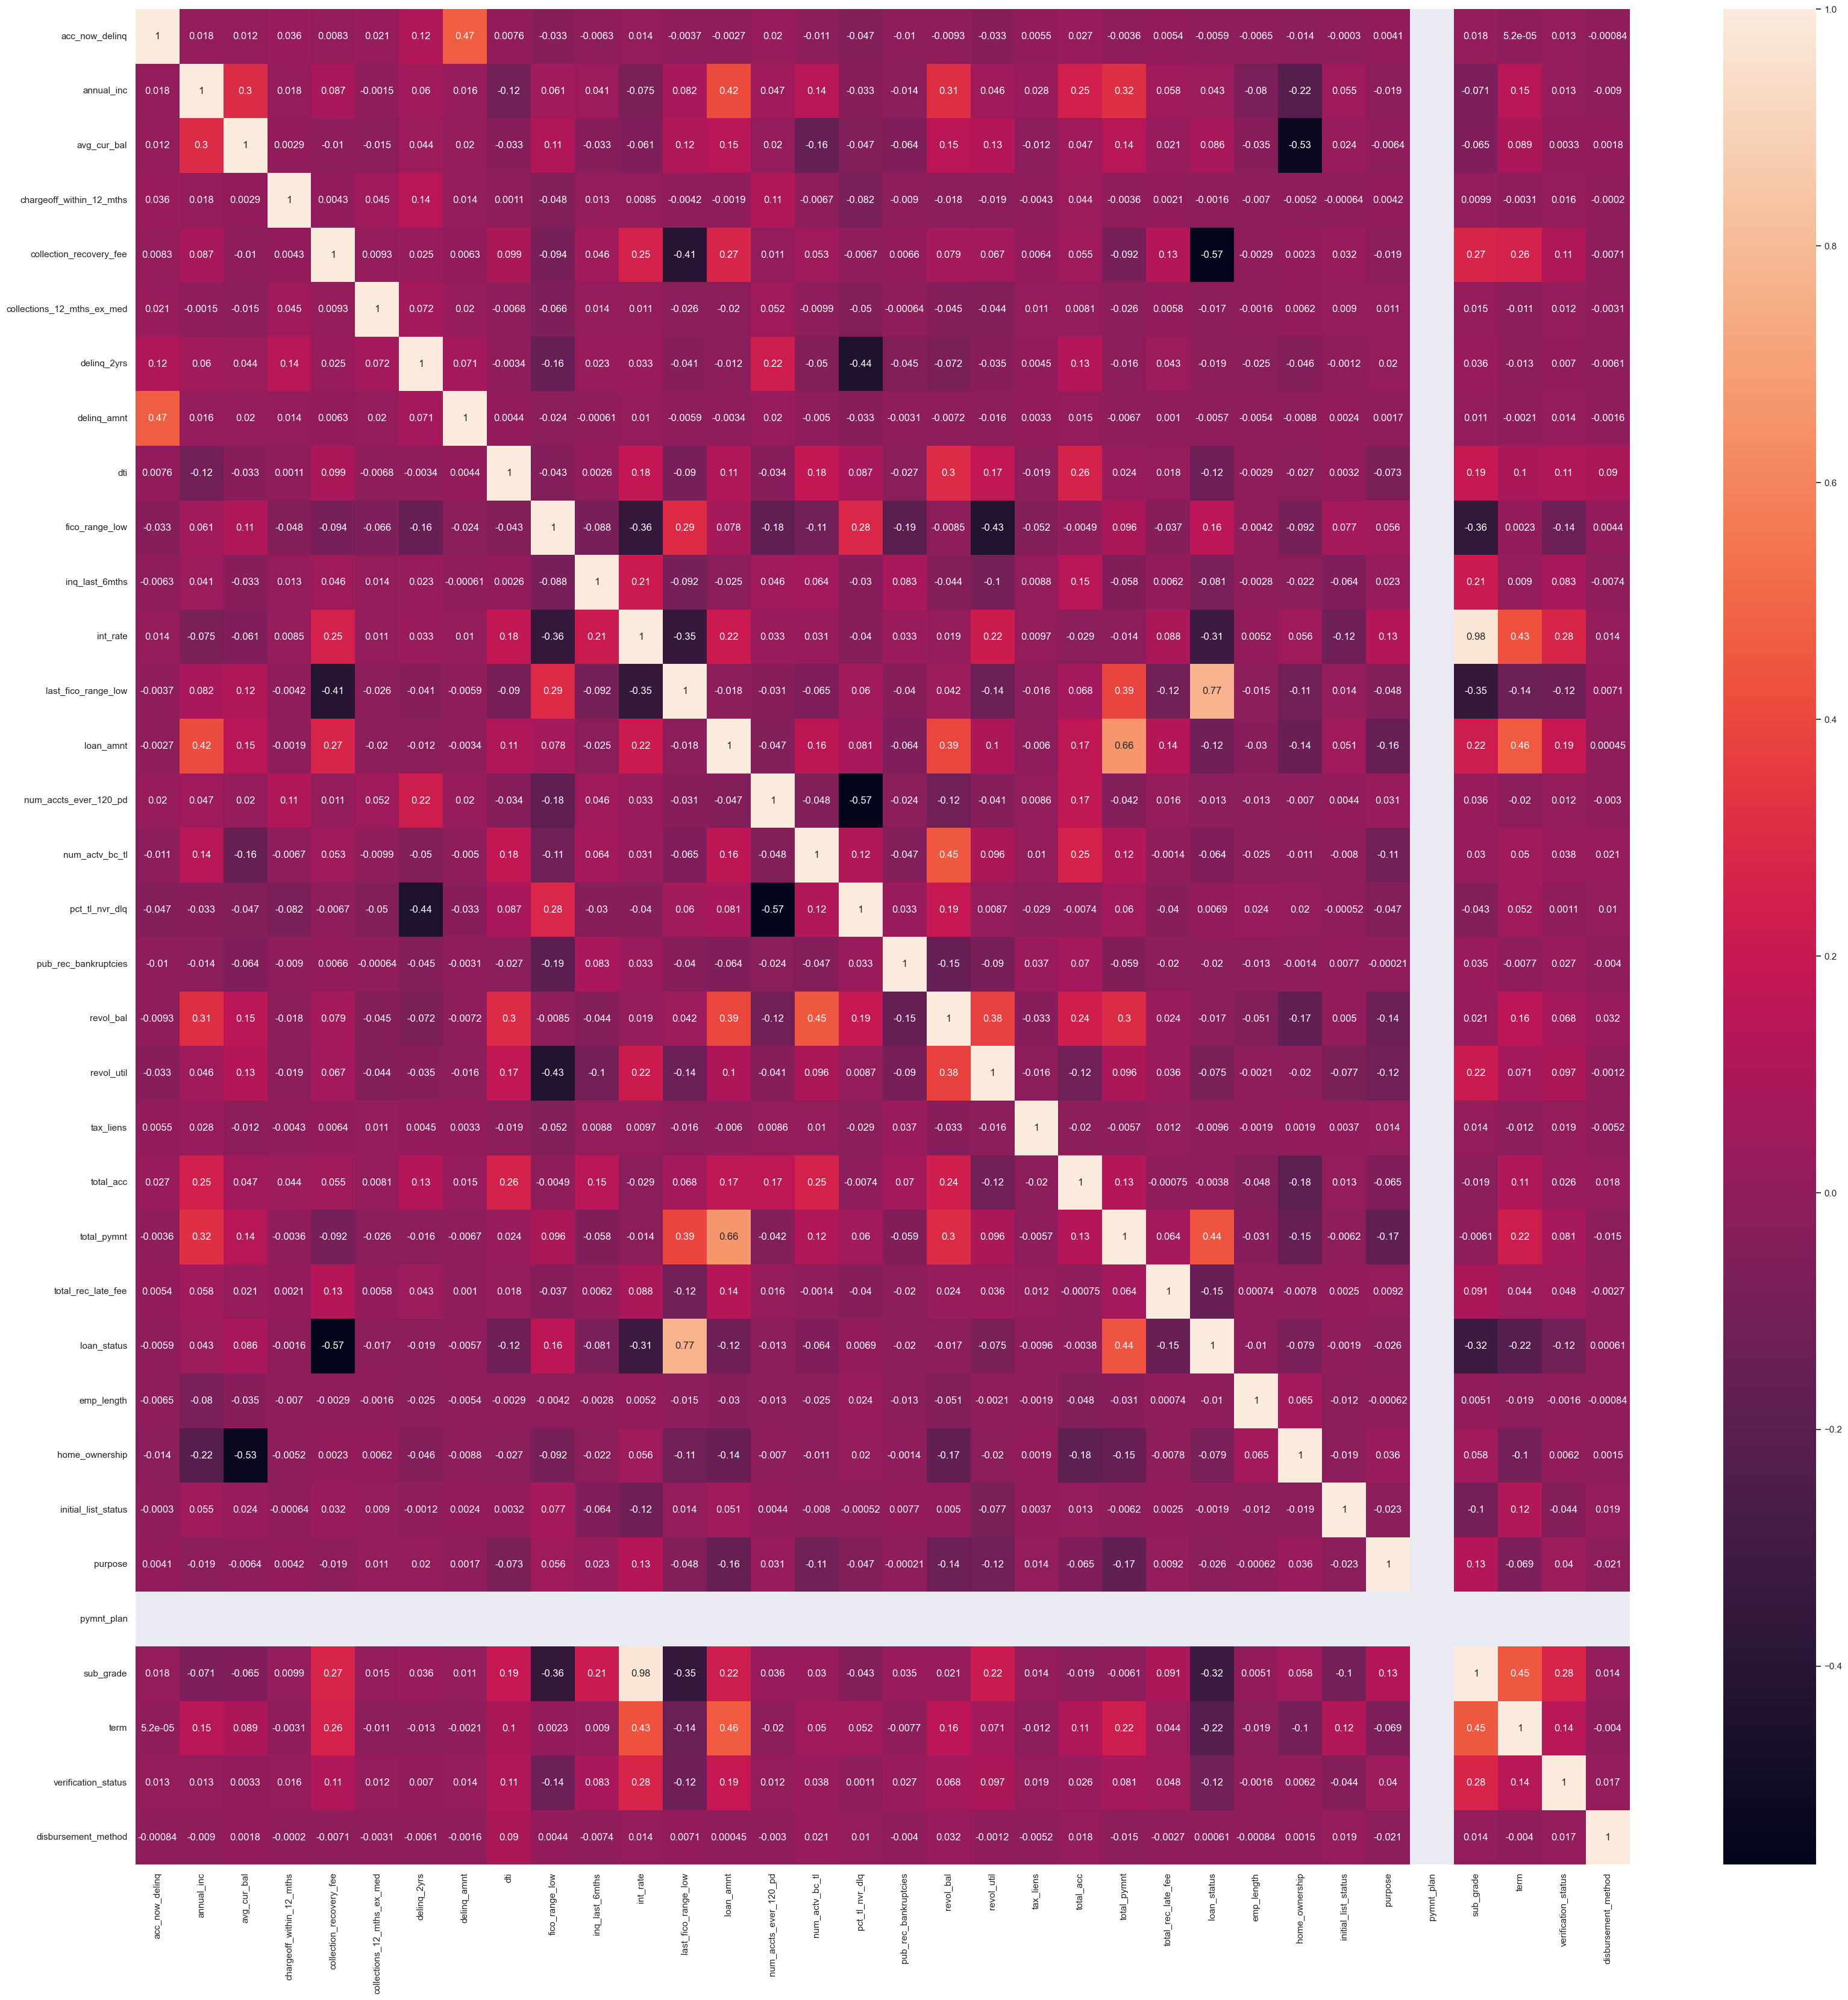

In [49]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_downsampled.corr(), fmt='.2g', annot=True)

#9.Create model

##9.1.Definiendo vector de características (X) y variable target (y)

In [50]:
# Downsampled df - top 15 random forest
X = df_downsampled[["last_fico_range_low", "collection_recovery_fee", "total_pymnt", "loan_amnt", "int_rate", 
                    "sub_grade", "term", "revol_bal", "dti", "avg_cur_bal", "revol_util", "total_rec_late_fee",
                    "fico_range_low", "annual_inc", "total_acc"]]

y = df_downsampled['loan_status']

In [51]:
X.columns

Index(['last_fico_range_low', 'collection_recovery_fee', 'total_pymnt',
       'loan_amnt', 'int_rate', 'sub_grade', 'term', 'revol_bal', 'dti',
       'avg_cur_bal', 'revol_util', 'total_rec_late_fee', 'fico_range_low',
       'annual_inc', 'total_acc'],
      dtype='object')

##9.2.Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en si mismos.

Tener múltiples divisiones puede ser útil si desea estimar mejor el rendimiento de su modelo.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [53]:
# k-folds cross-validation 
# X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size=0.2,random_state=10)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, test_size=0.2,random_state=20)
# X3_train, X3_test, y3_train, y3_test = train_test_split(X,y, test_size=0.2,random_state=30)
# X4_train, X4_test, y4_train, y4_test = train_test_split(X,y, test_size=0.2,random_state=40)
# X5_train, X5_test, y5_train, y5_test = train_test_split(X,y, test_size=0.2,random_state=50)

##9.3.Imputar el modelo

# LOG REG

In [54]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
# LR.fit(X1_train, y1_train)
# LR.fit(X2_train, y2_train)
# LR.fit(X3_train, y3_train)
# LR.fit(X4_train, y4_train)
# LR.fit(X5_train, y5_train)

LogisticRegression(random_state=0)

In [55]:
y_pred = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

# y1_pred = LR.predict(X1_test)
# print("Accuracy Score :", round(accuracy_score(y1_test, y1_pred)*100 ,2), "%")

# y2_pred = LR.predict(X2_test)
# print("Accuracy Score :", round(accuracy_score(y2_test, y2_pred)*100 ,2), "%")

# y3_pred = LR.predict(X3_test)
# print("Accuracy Score :", round(accuracy_score(y3_test, y3_pred)*100 ,2), "%")

# y4_pred = LR.predict(X4_test)
# print("Accuracy Score :", round(accuracy_score(y4_test, y4_pred)*100 ,2), "%")

# y5_pred = LR.predict(X5_test)
# print("Accuracy Score :", round(accuracy_score(y5_test, y5_pred)*100 ,2), "%")

Accuracy Score : 95.07 %


In [56]:
# TRAIN SCORE
y_pred_train = LR.predict(X_train)
print("Accuracy Score Train :", round(accuracy_score(y_train, y_pred_train)*100 ,2), "%")

Accuracy Score Train : 95.06 %


In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9506577621306387
Precision Score :  0.9506577621306387
Recall Score :  0.9506577621306387
Jaccard Score :  0.9059558719954924


In [58]:
from sklearn.metrics import classification_report

In [59]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     36961
           1       0.93      0.97      0.95     37458

    accuracy                           0.95     74419
   macro avg       0.95      0.95      0.95     74419
weighted avg       0.95      0.95      0.95     74419



In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

<Figure size 900x900 with 0 Axes>

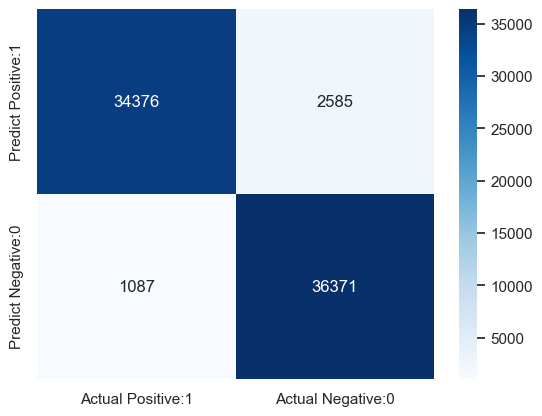

<Figure size 900x900 with 0 Axes>

In [61]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [62]:
cm_matrix

Actual Positive:1  Actual Negative:0
Predict Positive:1              34376               2585
Predict Negative:0               1087              36371

#10.Curva ROC
La curva ROC (Receiver Operating Characteristic) se utiliza para evaluar el rendimiento de los algoritmos de clasificación binaria.

La curva ROC se genera calculando y trazando la tasa de verdaderos positivos (TPR)
contra la tasa de falsos positivos (FPR) para un solo clasificador en una variedad de umbrales.

In [63]:
# sacar las probabilidades
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

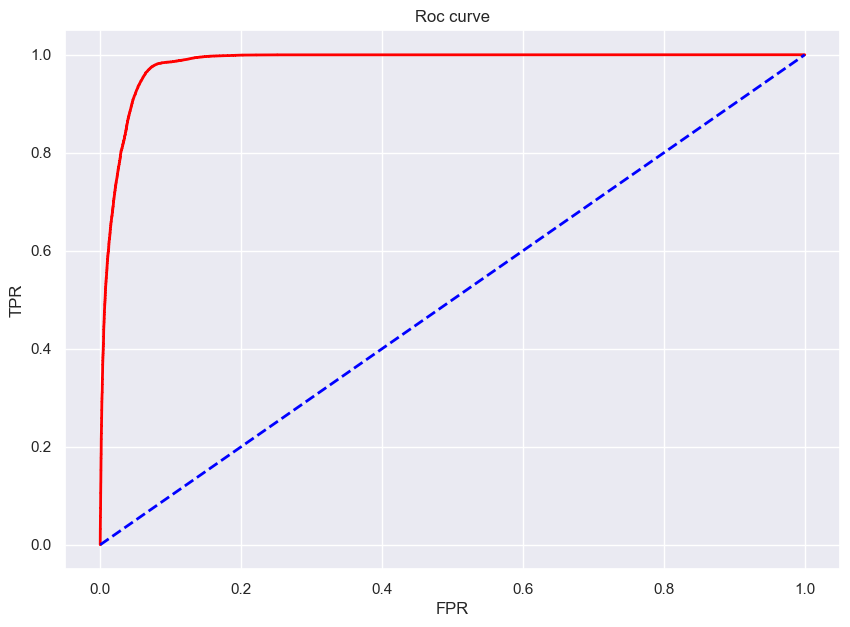

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#11.Extraer coeficientes

In [65]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [66]:
# Esta es una regresión, por lo que tiene coeficientes, veámoslos
# Tenga en cuenta que con sklearn no hay manera de demostrar la confiabilidad.
print('Intercept: ' + str(LR.intercept_))
print('Coefficients (5 largest and 5 smallest) [recall, there are 20 of them, in total: ')
summary = pd.DataFrame([X_test.columns,LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top5positive = summary.head(5) # los 5 más grandes (por valor)
top5negative = summary.tail(5) # Los 5 más pequeños (por valor)
top5list=pd.DataFrame()
top5list= top5list.append(pd.DataFrame(data = top5positive))
top5list= top5list.append(pd.DataFrame(data = top5negative))
top5list

Intercept: [2.49325115e-06]
Coefficients (5 largest and 5 smallest) [recall, there are 20 of them, in total: 


Variable Coefficient
0       last_fico_range_low    0.001473
12           fico_range_low    0.000075
14                total_acc    0.000041
9               avg_cur_bal    0.000029
13               annual_inc    0.000029
10               revol_util   -0.000431
11       total_rec_late_fee   -0.000504
4                  int_rate   -0.002197
3                 loan_amnt   -0.014548
1   collection_recovery_fee   -0.044874

#12.Fin

In [67]:
df_downsampled.to_csv("2023-10-15.csv", index = False)

In [68]:
df_downsampled.to_csv

KeyboardInterrupt: 

#13.FIN

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#Hacemos predicción con CLF Gini
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
#Estimamos precisión
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.92
Precisión en el set de Test: 0.92


##1.Metricas de desempeño
Accurracy score con criterio Gini Index

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.9183541837433988
Precision Score :  0.9183541837433988
Recall Score :  0.9183541837433988
Jaccard Score :  0.8490341014969874


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

           0       0.94      0.89      0.92     36961
           1       0.90      0.94      0.92     37458

    accuracy                           0.92     74419
   macro avg       0.92      0.92      0.92     74419
weighted avg       0.92      0.92      0.92     74419



<Figure size 900x900 with 0 Axes>

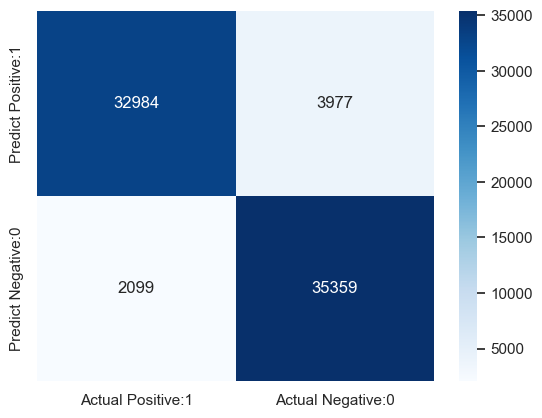

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
cm_matrix

Actual Positive:1  Actual Negative:0
Predict Positive:1              32984               3977
Predict Negative:0               2099              35359

##2.Visualización del árbol

[Text(0.5555555555555556, 0.875, 'X[0] <= 29.5\ngini = 0.5\nsamples = 297673\nvalue = [149085, 148588]'),
 Text(0.3333333333333333, 0.625, 'X[1] <= 0.5\ngini = 0.239\nsamples = 160859\nvalue = [138537, 22322]'),
 Text(0.2222222222222222, 0.375, 'X[0] <= 17.5\ngini = 0.437\nsamples = 69165\nvalue = [46843, 22322]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.312\nsamples = 43305\nvalue = [34919, 8386]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.497\nsamples = 25860\nvalue = [11924, 13936]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 91694\nvalue = [91694, 0]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 2.0\ngini = 0.142\nsamples = 136814\nvalue = [10548, 126266]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 6972.0\ngini = 0.066\nsamples = 130728\nvalue = [4462, 126266]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 510\nvalue = [510, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.059\nsamples = 130218\nvalue = [3952, 126266]'),
 Text(0.8888888888888888, 0.37

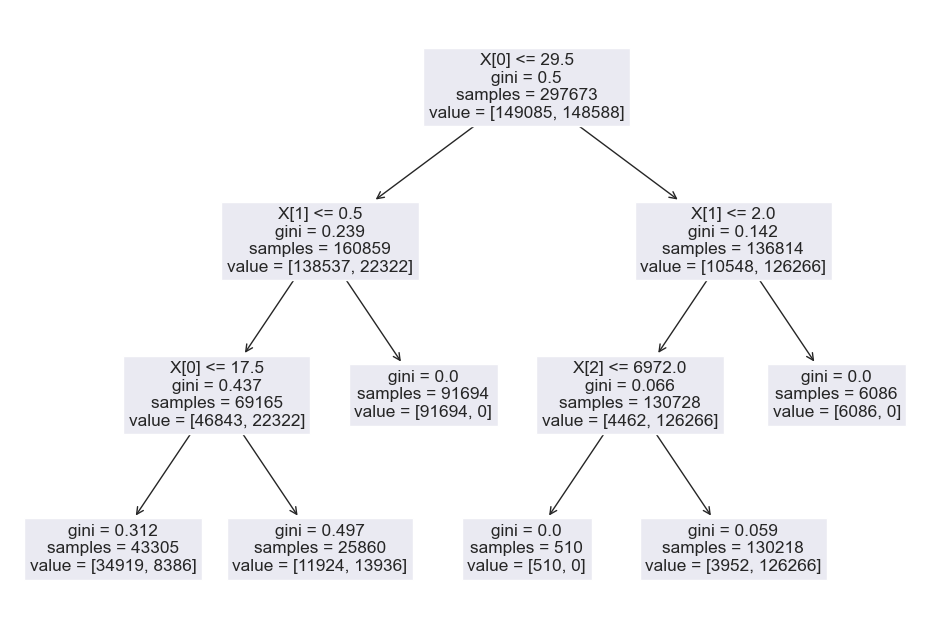

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))


##3.Visualizar el árbol con graphviz

In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydotplus


In [ ]:
#Instalar Graphviz en Python pip install graphviz
import graphviz
import pydotplus
%matplotlib inline

In [ ]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Instanciamos el modelo con criterio gini entropy


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predecir con test set para el criterio entropy

In [ ]:
#Hacemos predicciones
y_pred_en = clf_en.predict(X_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.91
Precisión en el set de Test: 0.91


##Metricas de desempeño
Accurracy score con criterio Entropy

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_en, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_en, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_en, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_en, average='micro')))

F-1 Score :  0.9104664131471801
Precision Score :  0.9104664131471801
Recall Score :  0.9104664131471801
Jaccard Score :  0.8356478626575565


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92     36961
           1       0.97      0.85      0.91     37458

    accuracy                           0.91     74419
   macro avg       0.92      0.91      0.91     74419
weighted avg       0.92      0.91      0.91     74419



<Figure size 900x900 with 0 Axes>

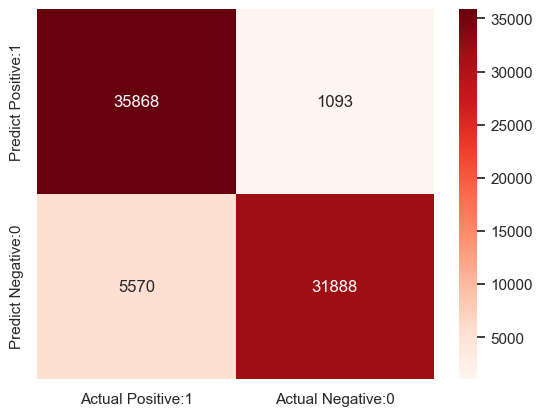

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [ ]:
cm_matrix

Actual Positive:1  Actual Negative:0
Predict Positive:1              35868               1093
Predict Negative:0               5570              31888

[Text(0.5555555555555556, 0.875, 'X[0] <= 29.5\nentropy = 1.0\nsamples = 297673\nvalue = [149085, 148588]'),
 Text(0.3333333333333333, 0.625, 'X[1] <= 0.5\nentropy = 0.581\nsamples = 160859\nvalue = [138537, 22322]'),
 Text(0.2222222222222222, 0.375, 'X[2] <= 158785.0\nentropy = 0.907\nsamples = 69165\nvalue = [46843, 22322]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.541\nsamples = 27824\nvalue = [24367, 3457]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.994\nsamples = 41341\nvalue = [22476, 18865]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 91694\nvalue = [91694, 0]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 2.0\nentropy = 0.392\nsamples = 136814\nvalue = [10548, 126266]'),
 Text(0.6666666666666666, 0.375, 'X[2] <= 144864.5\nentropy = 0.215\nsamples = 130728\nvalue = [4462, 126266]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.638\nsamples = 15849\nvalue = [2559, 13290]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.122\nsamples = 114879\nvalue = [19

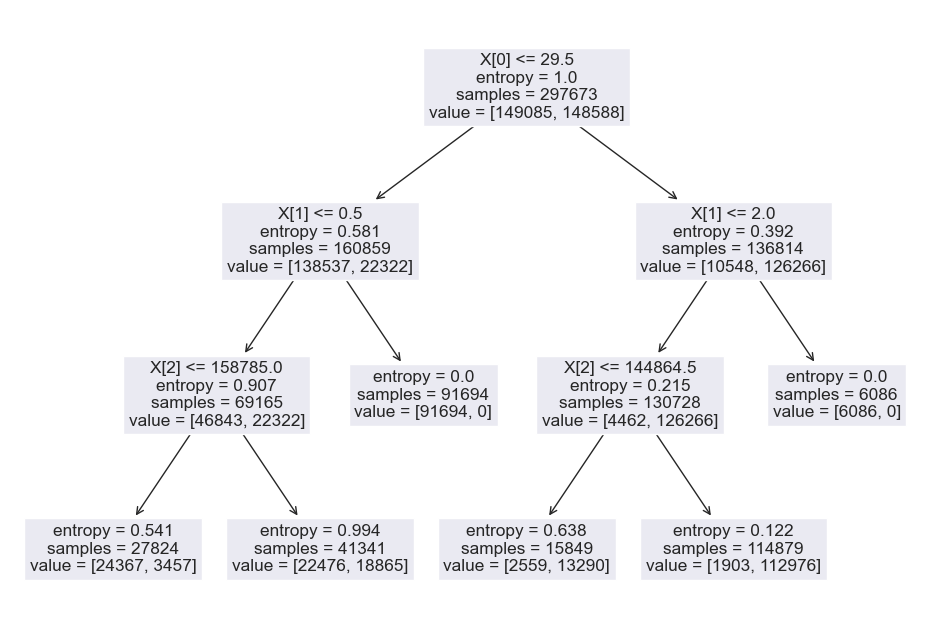

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
X.columns[12]
X.columns[4]

'int_rate'

In [ ]:
dot_data = tree.export_graphviz(clf_en, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

##El modelo funciona muy bien tanto con el criterio Gini como Entropy --> (??)

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Precisión en el set de Entrenamiento: 0.83
Precisión en el set de Test: 0.83


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))


F-1 Score :  0.8344508794797028
Precision Score :  0.8344508794797028
Recall Score :  0.8344508794797028
Jaccard Score :  0.715929397387565


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.68      0.80     36961
           1       0.76      0.99      0.86     37458

    accuracy                           0.83     74419
   macro avg       0.87      0.83      0.83     74419
weighted avg       0.87      0.83      0.83     74419



<Figure size 900x900 with 0 Axes>

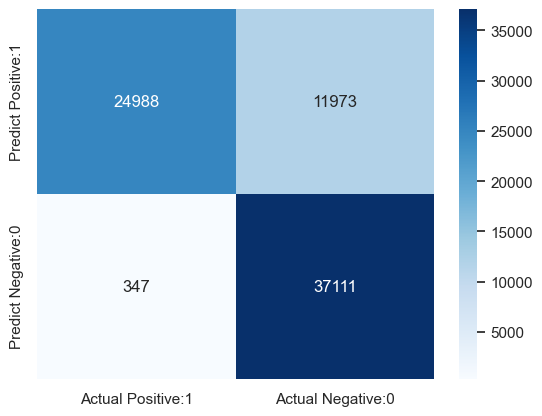

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
cm_matrix

Actual Positive:1  Actual Negative:0
Predict Positive:1              24988              11973
Predict Negative:0                347              37111

##Curva ROC
La curva ROC (Receiver Operating Characteristic) se utiliza para evaluar el rendimiento de los algoritmos de clasificación binaria.

La curva ROC se genera calculando y trazando la tasa de verdaderos positivos (TPR)
contra la tasa de falsos positivos (FPR) para un solo clasificador en una variedad de umbrales.

In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

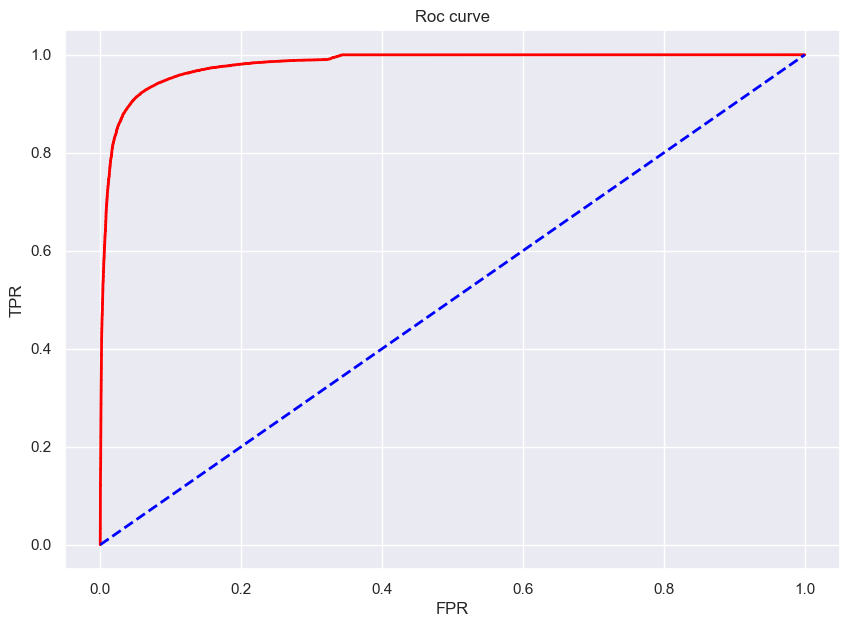

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

##Tips de mejora: Usar selectKbest

In [ ]:
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k="all")
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['last_fico_range_low', 'collection_recovery_fee', 'total_pymnt',
       'loan_amnt', 'int_rate', 'sub_grade', 'term', 'revol_bal', 'dti',
       'avg_cur_bal', 'revol_util', 'total_rec_late_fee', 'fico_range_low',
       'annual_inc', 'total_acc'],
      dtype='object')


# K-NEAREST NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))


Precisión en el set de Entrenamiento: 0.91
Precisión en el set de Test: 0.85


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))


F-1 Score :  0.8476598718069311
Precision Score :  0.847659871806931
Recall Score :  0.847659871806931
Jaccard Score :  0.7355986753113485


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.81      0.84     36961
           1       0.82      0.89      0.85     37458

    accuracy                           0.85     74419
   macro avg       0.85      0.85      0.85     74419
weighted avg       0.85      0.85      0.85     74419



<Figure size 900x900 with 0 Axes>

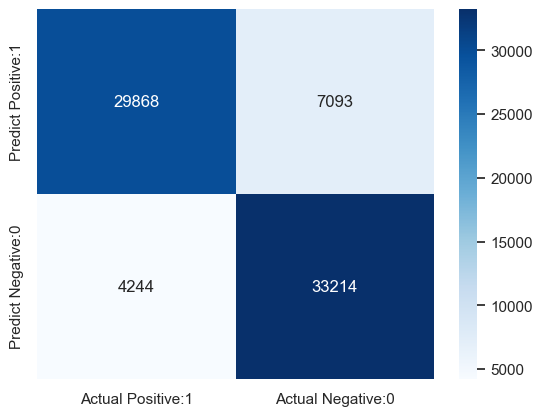

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
cm_matrix

Actual Positive:1  Actual Negative:0
Predict Positive:1              29868               7093
Predict Negative:0               4244              33214

#Curva ROC
La curva ROC (Receiver Operating Characteristic) se utiliza para evaluar el rendimiento de los algoritmos de clasificación binaria.

La curva ROC se genera calculando y trazando la tasa de verdaderos positivos (TPR)
contra la tasa de falsos positivos (FPR) para un solo clasificador en una variedad de umbrales.

In [ ]:
# sacar las probabilidades
y_pred_prob = knn.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

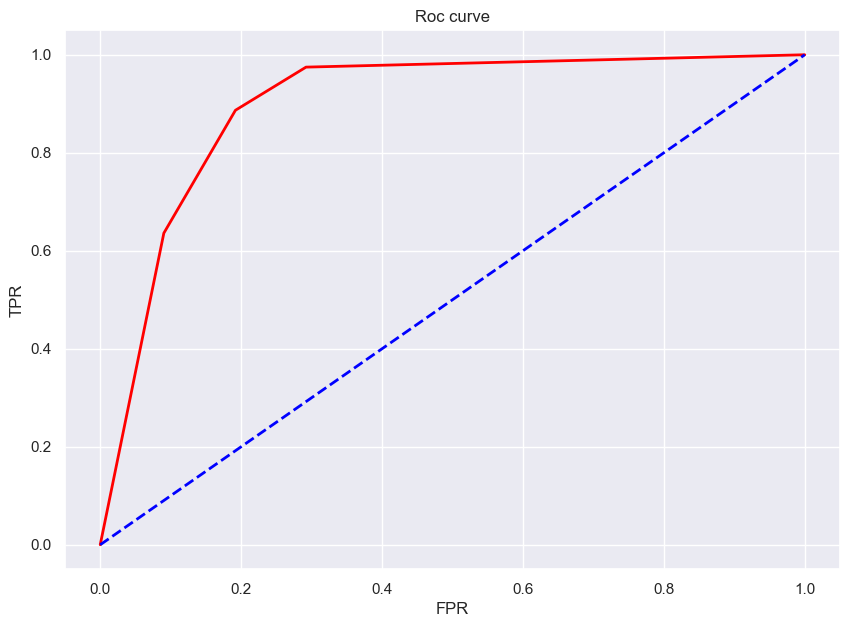

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

##Delimitar valor de K

In [ ]:
vecinos = np.arange(1, 20)
vecinos


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [ ]:
train_ex =np.empty(len(vecinos))
test_ex =np.empty(len(vecinos))


In [ ]:
for i, k in enumerate(vecinos):
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit(X_train, y_train)
    train_ex[i] = knn.score(X_train, y_train)
    test_ex[i] = knn.score(X_test, y_test)


KeyboardInterrupt: 

In [ ]:
train_ex


array([1.        , 0.99764652, 0.9948084 , 0.99446694, 0.99304605,
       0.99295426, 0.99186013, 0.99180138, 0.99091653, 0.99084677,
       0.99020792, 0.99027401, 0.98960578, 0.98960946, 0.98905505,
       0.98910645, 0.98857774, 0.98852634, 0.98805271])

##Crear un plot para ver valores de K

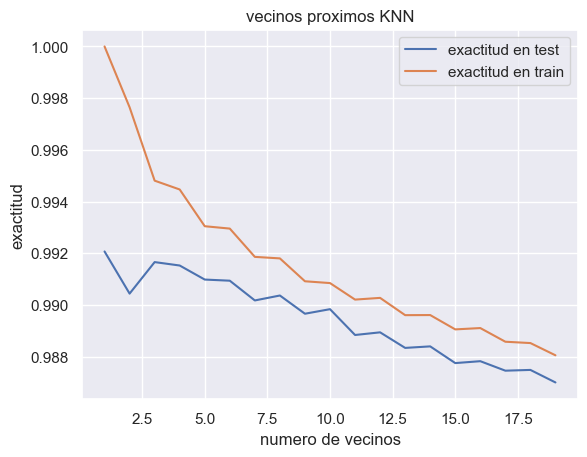

In [ ]:
plt.title("vecinos proximos KNN")
plt.plot(vecinos, test_ex, label = "exactitud en test")
plt.plot(vecinos, train_ex, label = "exactitud en train")
plt.legend()
plt.xlabel("numero de vecinos")
plt.ylabel("exactitud")
plt.show()

##Probar el modelo

In [ ]:
X_new = np.array([[25, 8, 2, 7, 1, 2, 0, 0, 3, 3, 371, 1, 999, 0, 1, -2.9, 92.469, -33.6, 1.044, 5076.2],
                 [37, 10, 2, 2, 1, 2, 2, 0, 3, 4, 633, 1, 999, 0, 1, 1.4, 93.918, -42.7, 4.963, 5228.1]])

In [ ]:
#predection1 = knn.predict(X_new)

#ValueError: X has 20 features, but KNeighborsClassifier is expecting 46 features as input.

In [ ]:
#predection1

# SVM

In [ ]:
#old code: TypeError: SVC.__init__() takes 1 positional argument but 3 were given
  # from sklearn.svm import SVC
  # svc = SVC("c=1", "gamma=1")
  # svc.fit(X_train, y_train)

from sklearn.svm import SVC
svc = SVC(C=1, gamma=1, verbose=True)
svc.fit(X_train, y_train)

[LibSVM]

In [ ]:
y_pred = svc.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(svc.score(X_test, y_test)))


Precisión en el set de Entrenamiento: 0.85
Precisión en el set de Test: 0.80


In [ ]:
# Código añadido el 3 de julio:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.8029465930018416
Precision Score :  0.8029465930018416
Recall Score :  0.8029465930018416
Jaccard Score :  0.6707692307692308


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       281
           1       0.80      0.79      0.79       262

    accuracy                           0.80       543
   macro avg       0.80      0.80      0.80       543
weighted avg       0.80      0.80      0.80       543



<Figure size 900x900 with 0 Axes>

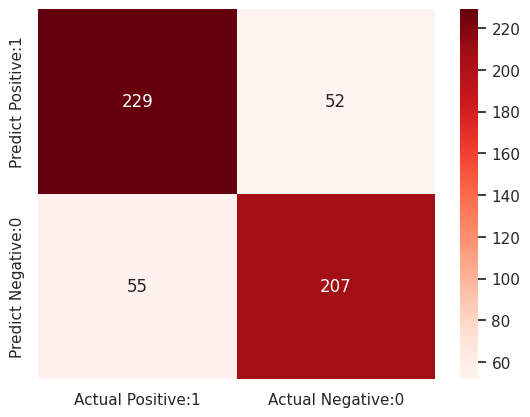

<Figure size 900x900 with 0 Axes>

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

##Obtener C Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1, 1, 10, 100, 1000], "gamma":[1, 0.1, 0.01, 0.001, 0.0001]}


In [ ]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [ ]:
grid.best_params_


{'C': 100, 'gamma': 1}

##SVM Funciones Kernel

###Linear Kernel function

In [ ]:
linear_classifier = SVC(kernel='linear').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.792


In [ ]:
# TRAIN SCORE
# linear_classifier = SVC(kernel='linear').fit(X_train,y_train)
# y_pred = linear_classifier.predict(X_train)
# print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_train, y_pred)))

<Axes: >

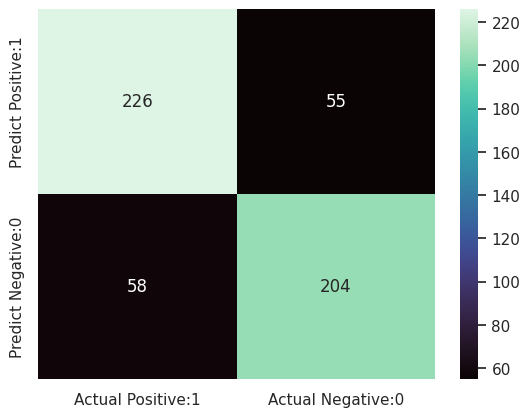

In [ ]:
# Matriz de confusión para SVM Linear Kernel
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       281
           1       0.79      0.78      0.78       262

    accuracy                           0.79       543
   macro avg       0.79      0.79      0.79       543
weighted avg       0.79      0.79      0.79       543



In [ ]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

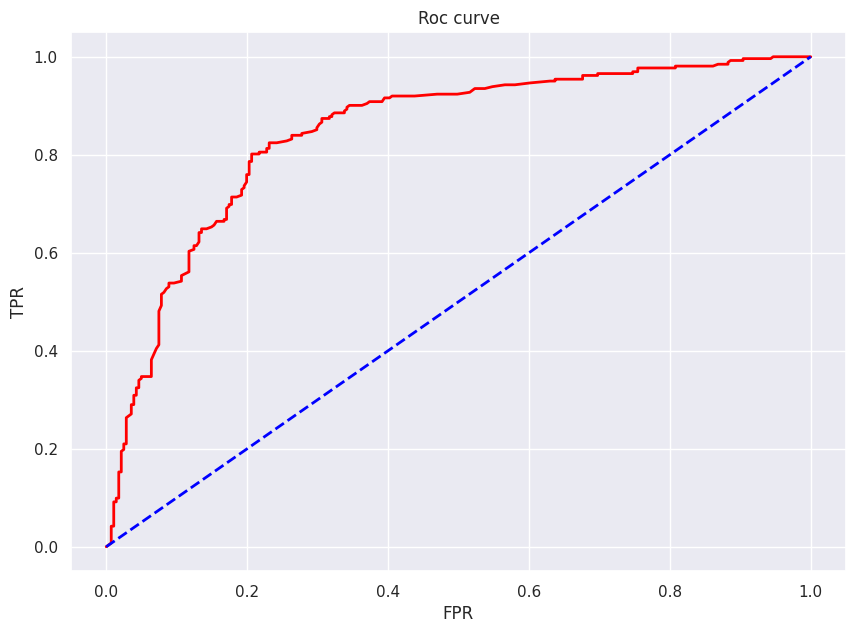

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [ ]:
# Codigo añadido el 4 de julio
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7918968692449356
Precision Score :  0.7918968692449355
Recall Score :  0.7918968692449355
Jaccard Score :  0.6554878048780488


In [ ]:
# Código añadido el 4 de julio, para cros-validar resultados de random forest:
# Obtener los coeficientes del modelo
coefficients = linear_classifier.coef_[0]

# Obtener los índices de las características más significativas
top_features_indices = np.argsort(np.abs(coefficients))[::-1]

# Obtener los nombres de las características más significativas
top_features_names = X_train.columns[top_features_indices]

# Imprimir las 10 características más significativas
print("Top 10 de variables más significativas:")
for feature_name in top_features_names[:10]:
    print(feature_name)

Top 10 de variables más significativas:
Is.Non.Annual.
SPR.New.Existing
SingleGradeTripFlag
NPS 2010
FPP


###RBF Gaussian

In [ ]:
# Modelo SVM usando la función kernel Gaussian RBF
rbf_svc=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.672


<Axes: >

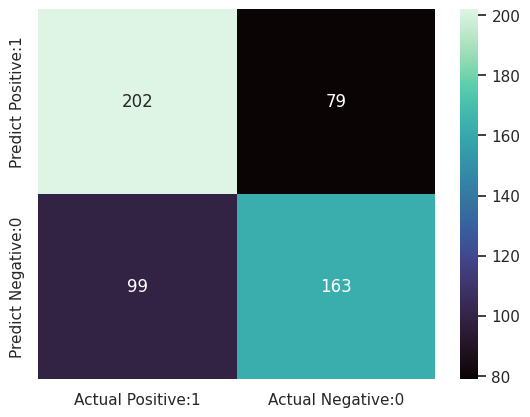

In [ ]:
# Matriz de confusión Gaussian RBF
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

###Polynomial

In [ ]:
# Modelo SVM usando la función kernel Polynomial
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with poly kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with poly kernel : 0.678


<Axes: >

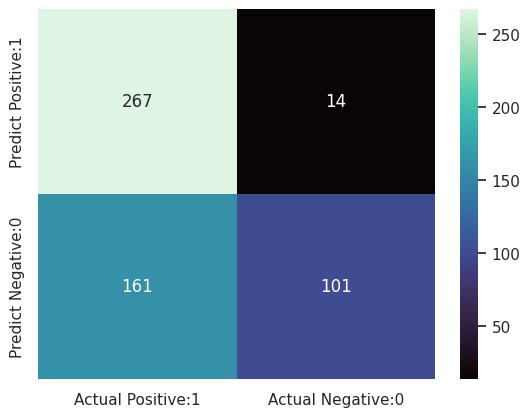

In [ ]:
# Matriz de confusión Polynomial
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

###Sigmoid

In [ ]:
# Modelo SVM usando la función kernel Sigmoid
Sig_svc=SVC(kernel='sigmoid', C=1).fit(X_train,y_train)
y_pred = Sig_svc.predict(X_test)
print('Model accuracy with sigmoid kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with sigmoid kernel : 0.517


<Axes: >

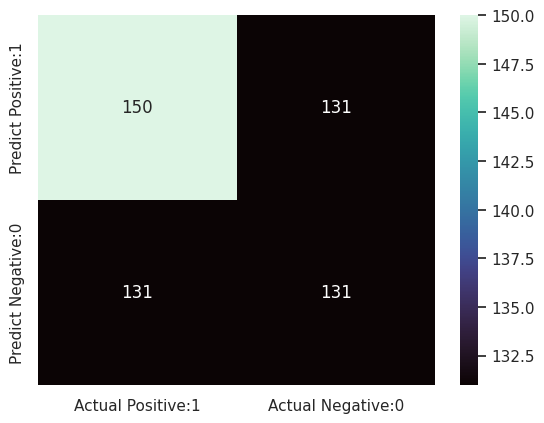

In [ ]:
# Matriz de confusión Sigmoid
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

###Missing: Precomputed?

##La función Kernel que mejor ajusta es lineal kernel

# RANDOM FOREST

In [69]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [70]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [71]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [72]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.9994289035283683
El accuracy en test es: 0.9834854002338113


In [73]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_test_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_test_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_test_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_test_pred, average='micro')))

F-1 Score :  0.9834854002338113
Precision Score :  0.9834854002338113
Recall Score :  0.9834854002338113
Jaccard Score :  0.9675074027072758


<Figure size 900x900 with 0 Axes>

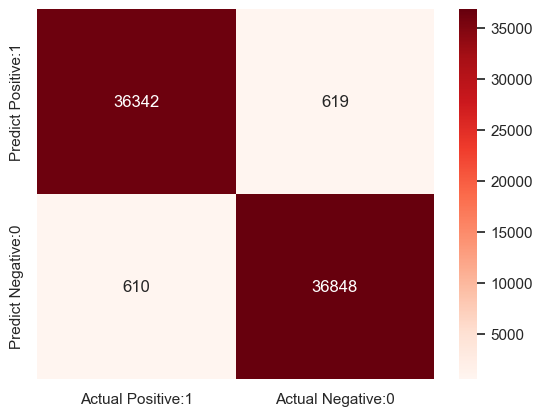

<Figure size 900x900 with 0 Axes>

In [74]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [75]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

feature  importance
1   collection_recovery_fee    0.342208
0       last_fico_range_low    0.266663
2               total_pymnt    0.174440
3                 loan_amnt    0.103609
6                      term    0.018709
11       total_rec_late_fee    0.016552
4                  int_rate    0.013592
7                 revol_bal    0.009850
8                       dti    0.009181
12           fico_range_low    0.008400
5                 sub_grade    0.008129
9               avg_cur_bal    0.008112
10               revol_util    0.007350
13               annual_inc    0.006914
14                total_acc    0.006290

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'collection_recovery_fee'),
  Text(1, 0, 'last_fico_range_low'),
  Text(2, 0, 'total_pymnt'),
  Text(3, 0, 'loan_amnt'),
  Text(4, 0, 'term'),
  Text(5, 0, 'total_rec_late_fee'),
  Text(6, 0, 'int_rate'),
  Text(7, 0, 'revol_bal'),
  Text(8, 0, 'dti'),
  Text(9, 0, 'fico_range_low'),
  Text(10, 0, 'sub_grade'),
  Text(11, 0, 'avg_cur_bal'),
  Text(12, 0, 'revol_util'),
  Text(13, 0, 'annual_inc'),
  Text(14, 0, 'total_acc')])

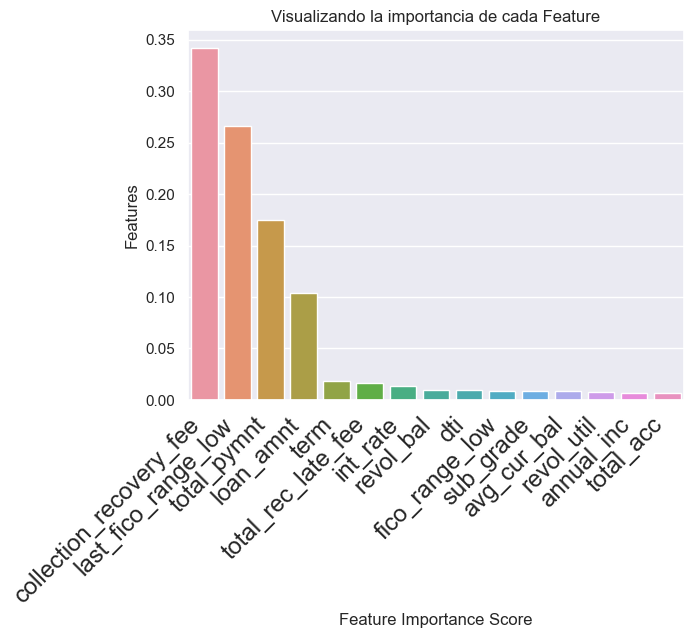

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

#10.Curva ROC

In [77]:
# sacar las probabilidades
y_pred_prob = random_forest.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

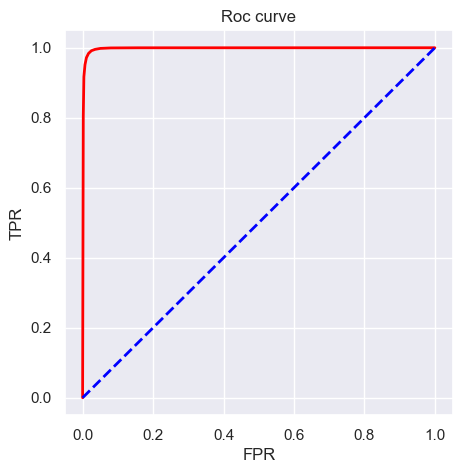

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize= (5, 5))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

**********************************